In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecombd",
                                           user = "postgres",
                                           password = "1234",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

# Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table 


In [61]:
#Division wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
division_wise_records = cur.fetchall()

successfully connected to database


In [62]:
division_wise_records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [63]:
div = pd.DataFrame(division_wise_records, columns=['division', 'sales'])
div

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [64]:
div =div.drop(7)

In [65]:
div
div.dtypes

division    object
sales       object
dtype: object

In [14]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [67]:
changetype(div)

In [68]:
div.dtypes
div

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [69]:
div=div.set_index(['division'])
div

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

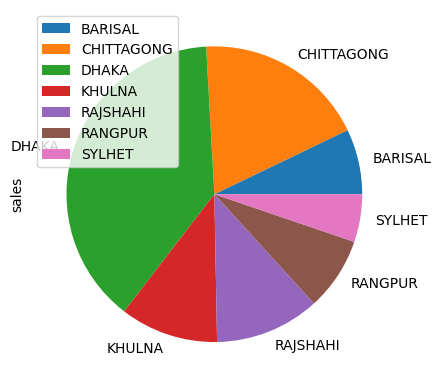

In [70]:
div.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 1000x500 with 0 Axes>

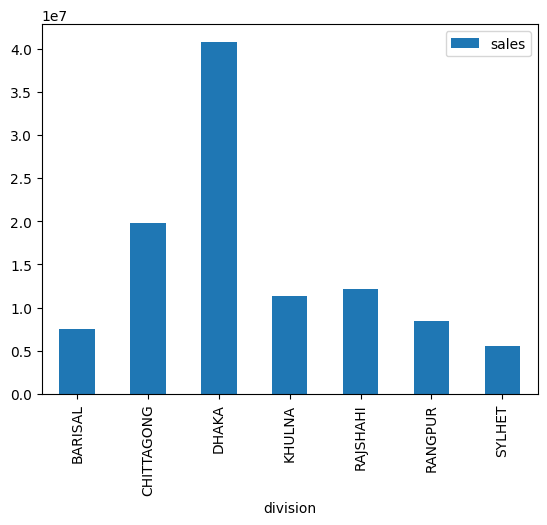

In [71]:
plt.figure(figsize=(10,5))
div.plot.bar(y='sales')

In [72]:
#District wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY s.district "
cur.execute(select_stmt)
district_wise_records = cur.fetchall()


successfully connected to database


In [19]:
district_wise_records

[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [90]:
dis = pd.DataFrame(district_wise_records, columns=['district', 'sales'])
dis

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25
63,THAKURGAON,729934.25


In [91]:
dis =dis.drop(64)
dis

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


In [93]:
changetype(dis)
dis.dtypes

district     object
sales       float64
dtype: object

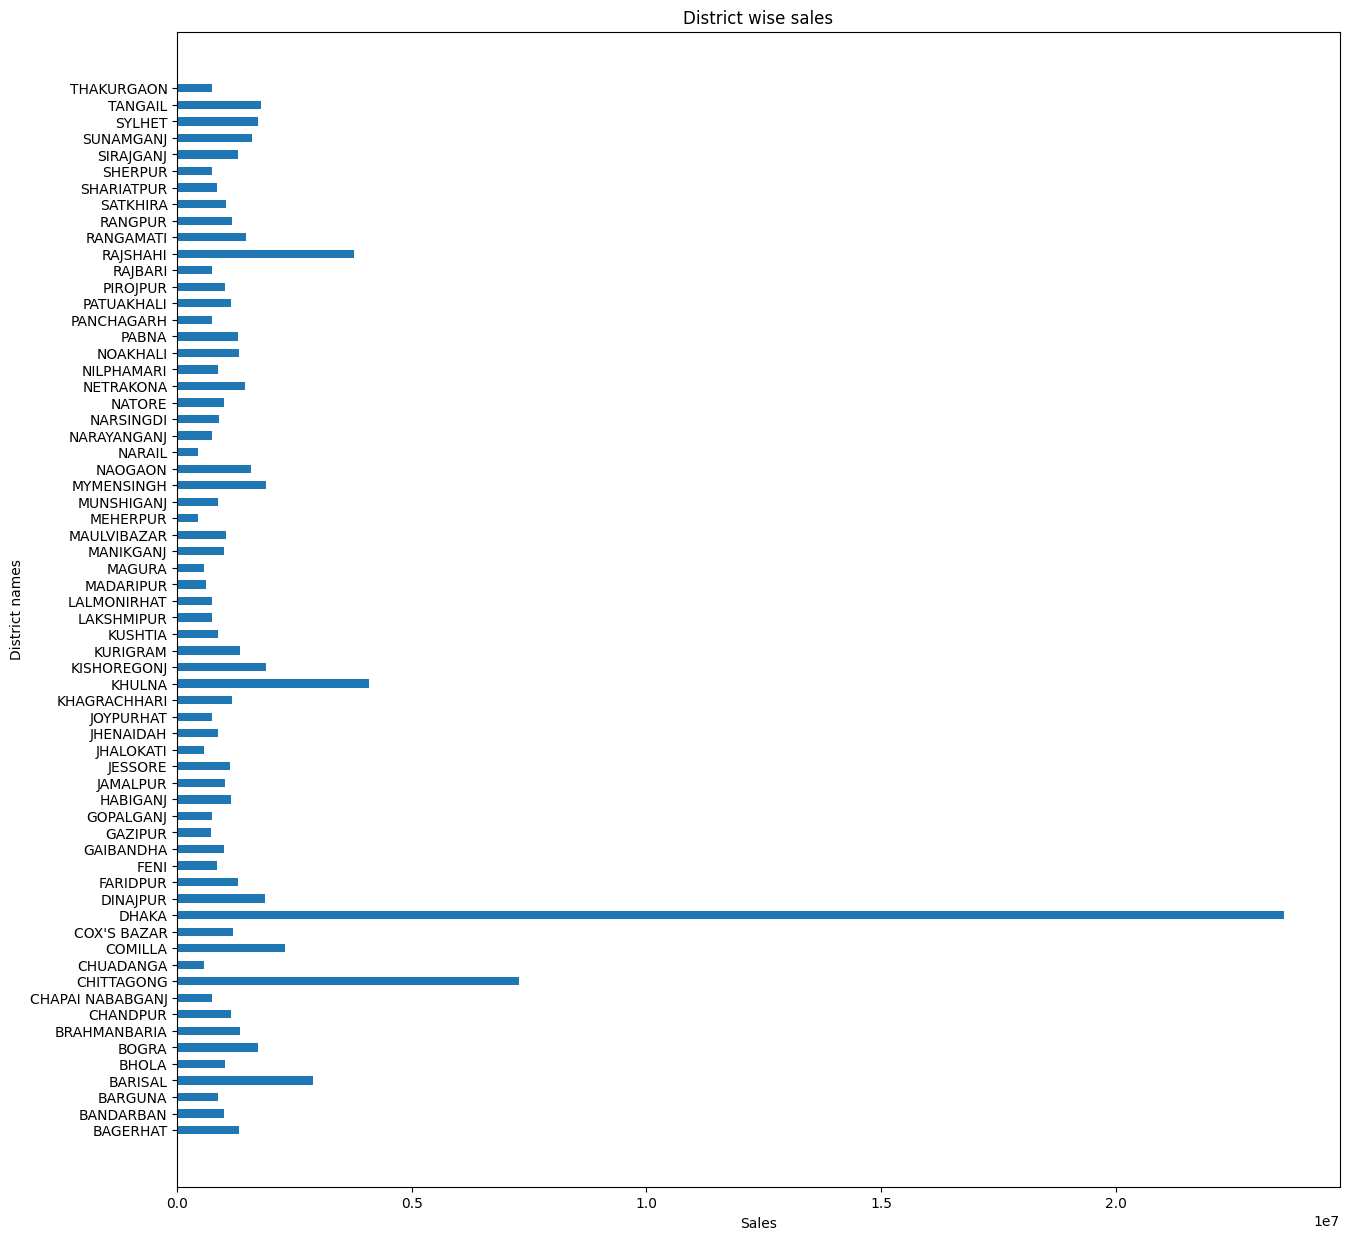

In [126]:
plt.figure(figsize=(15,15))
barlist = plt.barh(dis['district'],dis['sales'],height = 0.5)
plt.xlabel('Sales')
plt.ylabel('District names')
plt.title('District wise sales')
plt.show()

In [96]:
#Month wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.month, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.month) " \
                "ORDER BY s.month "
cur.execute(select_stmt)
month_wise_records = cur.fetchall()

successfully connected to database


In [103]:
mon = pd.DataFrame(month_wise_records, columns=['month', 'sales'])
mon

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [104]:
mon =mon.drop(12)
mon

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [99]:
changetype(mon)

<Axes: title={'center': 'month wise sales'}, xlabel='month', ylabel='sales'>

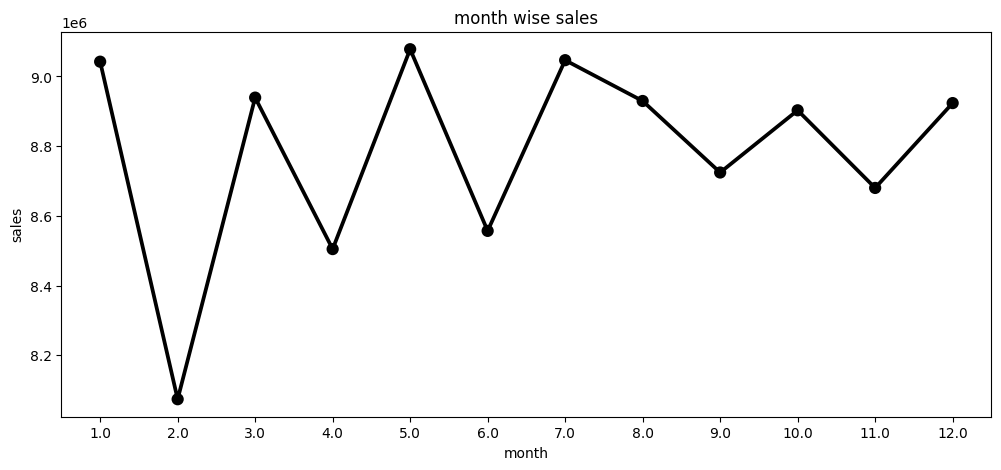

In [106]:
plt.figure(figsize=(12,5))
plt.xlabel('month')
plt.ylabel('sales')
plt.title('month wise sales')
sns.pointplot(data=mon,x='month',y='sales',color='black')


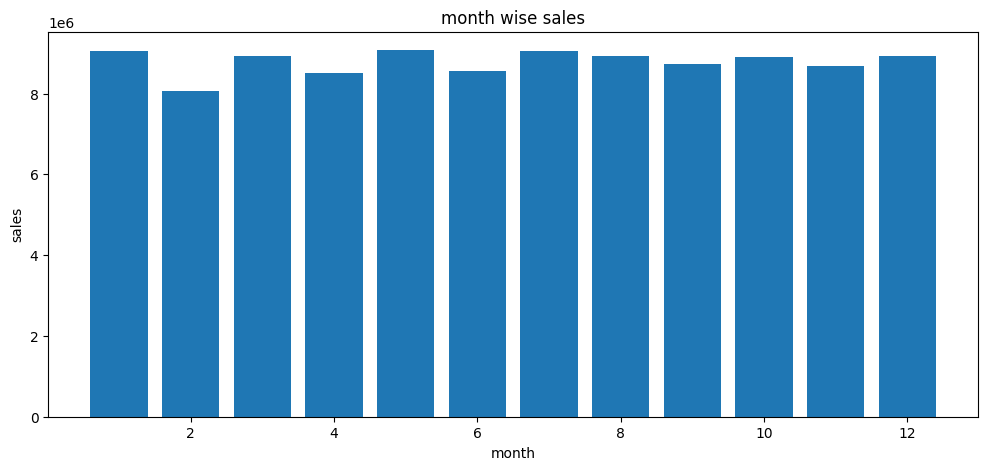

In [111]:
plt.figure(figsize=(12,5))
plt.xlabel('month')
plt.ylabel('sales')
plt.title('month wise sales')
plt.bar(mon['month'],mon['sales'])
plt.show()



In [113]:
#Year wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
year_wise_records = cur.fetchall()

successfully connected to database


In [119]:
year = pd.DataFrame(year_wise_records, columns=['year', 'sales'])
year

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25
8,NaN,105401435.75


In [120]:
year =year.drop(8)
year

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [121]:
changetype(year)

<Axes: title={'center': 'year wise sales'}, xlabel='year', ylabel='sales'>

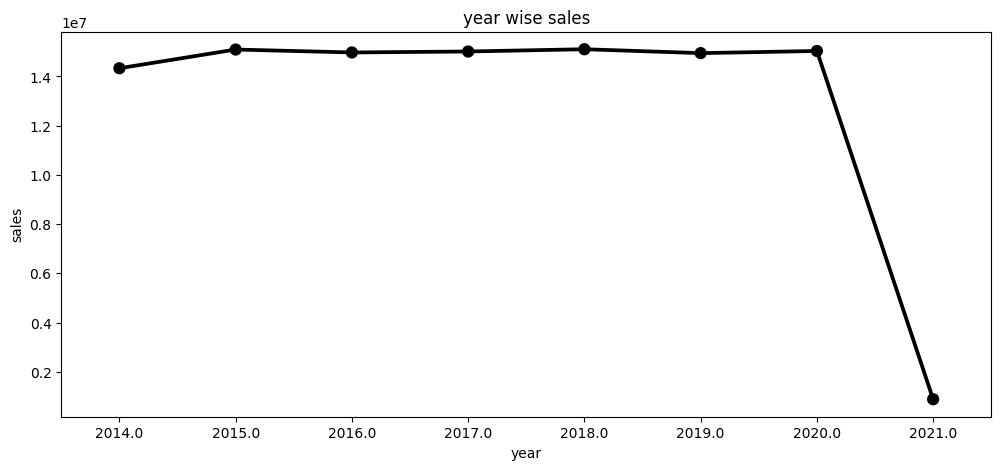

In [122]:
plt.figure(figsize=(12,5))
plt.xlabel('year')
plt.ylabel('sales')
plt.title('year wise sales')
sns.pointplot(data=year,x='year',y='sales',color='black')


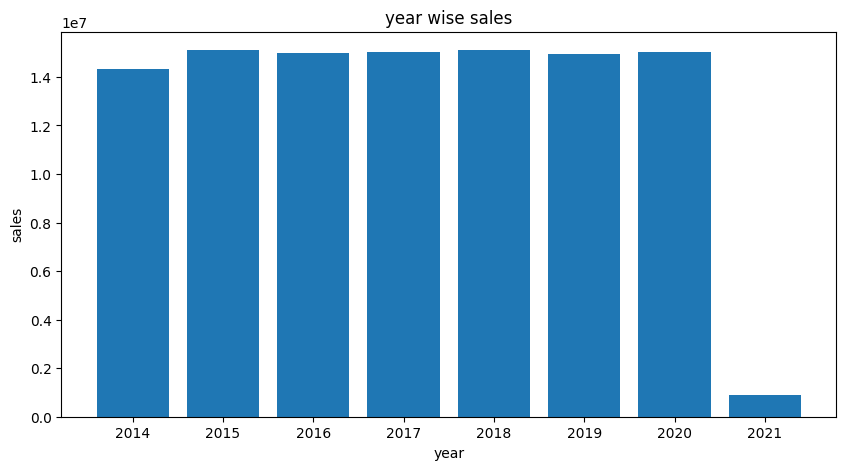

In [127]:
plt.figure(figsize=(10,5))
plt.xlabel('year')
plt.ylabel('sales')
plt.title('year wise sales')
plt.bar(year['year'],year['sales'])
plt.show()


# Q2. Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 


In [10]:
#customer wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "select q.name,p.total_price\
               FROM (SELECT s.customer_key, SUM(t.total_price) as total_price \
               FROM ecombd_star_schema.fact_table t\
               JOIN ecombd_star_schema.customer_dim s on s.customer_key=t.customer_key\
               GROUP BY CUBE(s.customer_key) \
               ORDER BY s.customer_key ) p JOIN ecombd_star_schema.customer_dim q \
               on p.customer_key=q.customer_key"
cur.execute(select_stmt)
customer_wise_records = cur.fetchall()

successfully connected to database


In [11]:
customer_wise_records

[('sumit', Decimal('8344.75')),
 ('tammanne', Decimal('11025.50')),
 ('kailash kumar', Decimal('12120.25')),
 ('bhagwati prasad', Decimal('13337.00')),
 ('ajay', Decimal('10893.25')),
 ('silender', Decimal('12937.75')),
 ('deepak', Decimal('12935.00')),
 ('akhilesh', Decimal('9714.00')),
 ('dipendra kumar', Decimal('11760.50')),
 ('nitin', Decimal('10208.00')),
 ('doodhnath pandit', Decimal('12475.50')),
 ('aslam allam', Decimal('8485.50')),
 ('rahul', Decimal('9942.50')),
 ('jitender kumar', Decimal('13356.00')),
 ('adnan', Decimal('11681.75')),
 ('vijay', Decimal('11040.50')),
 ('yogesh', Decimal('10221.75')),
 ('kabir', Decimal('12717.50')),
 ('sarvesh', Decimal('13237.25')),
 ('rakesh sarkar', Decimal('12206.00')),
 ('akash gupta', Decimal('9921.75')),
 ('rahul', Decimal('8973.50')),
 ('pintu thakur', Decimal('10079.00')),
 ('vivek', Decimal('10315.75')),
 ('mohd khairul', Decimal('9572.00')),
 ('farmaan khan', Decimal('11067.00')),
 ('vansu dev', Decimal('11222.50')),
 ('vansu dev

In [12]:
customer = pd.DataFrame(customer_wise_records, columns=['name', 'sales'])
customer

,name,sales
0,sumit,8344.75
1,tammanne,11025.50
2,kailash kumar,12120.25
3,bhagwati prasad,13337.00
4,ajay,10893.25
...,...,...
9186,smt radha,11953.75
9187,tulsi sharma,13868.75
9188,madhubala,11514.50
9189,pintu devi,12706.25


In [15]:
changetype(customer)

In [16]:
customer.dtypes

name      object
sales    float64
dtype: object

In [17]:
customer_temp = customer
customer_temp.sort_values(by=['sales'],inplace=True,ascending=False)
customer_temp

,name,sales
4348,ratmo devi,17104.50
5315,nisha,16853.25
272,kiran,16645.75
1437,sonam,16381.50
7552,harpreet kaur @ geetanjli,16288.75
...,...,...
5058,meena,7351.25
3049,meenaxi,7113.50
6016,bahwana,7105.50
4387,purva,7081.75


In [18]:
#set of top 10 highest sale customers
df_temp = customer_temp[0:10]

In [19]:
df_temp

,name,sales
4348,ratmo devi,17104.50
5315,nisha,16853.25
272,kiran,16645.75
1437,sonam,16381.50
7552,harpreet kaur @ geetanjli,16288.75
7414,rekha devi,16282.50
8008,neetu,16194.75
7204,minkashi,16154.50
2967,neha,16006.50
6901,sama parveen,15977.25


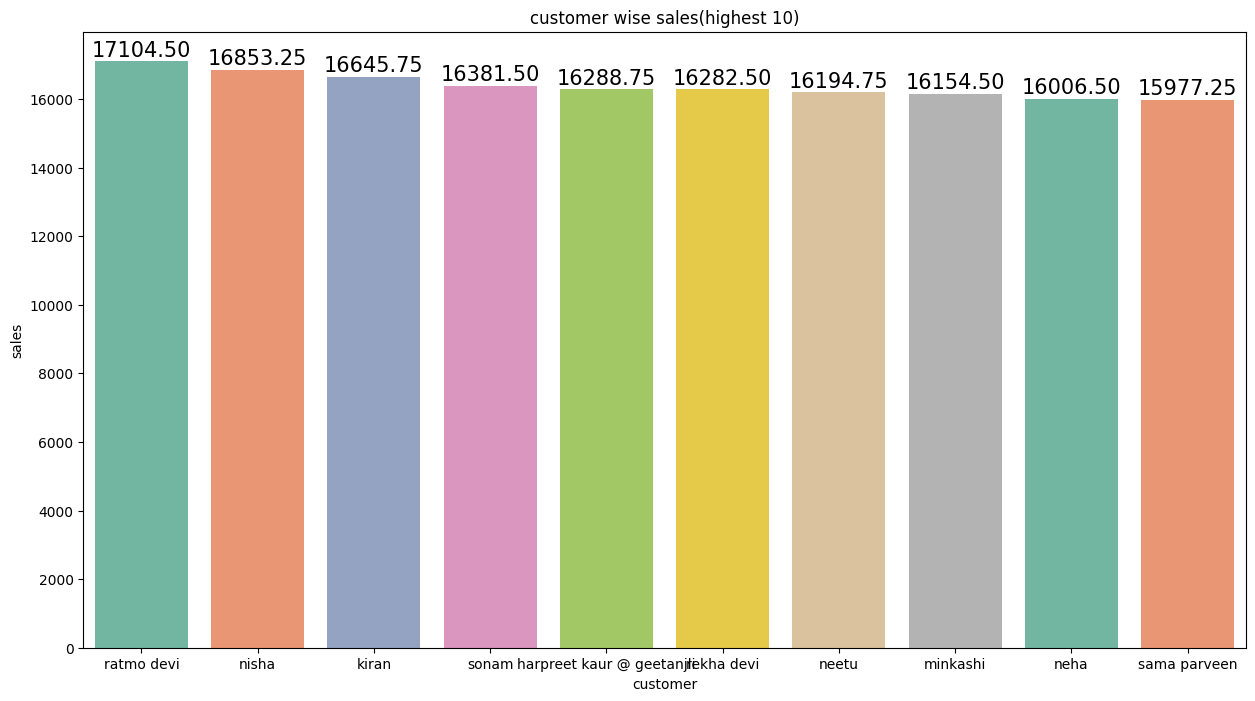

In [24]:
plt.figure(figsize=(15,8))
plots = sns.barplot(x=df_temp['name'],y=df_temp['sales'],palette="Set2")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0, 8),
                   textcoords='offset points')
    
                   
                  
plt.xlabel('customer')
plt.ylabel('sales')
plt.title('customer wise sales(highest 10)')                        
plt.show()                                    
                                    

In [26]:
customer_temp_2 = customer
customer_temp_2.sort_values(by=['sales'],inplace=True,ascending=True)
customer_temp_2


,name,sales
6401,riya,6986.50
4387,purva,7081.75
6016,bahwana,7105.50
3049,meenaxi,7113.50
5058,meena,7351.25
...,...,...
7552,harpreet kaur @ geetanjli,16288.75
1437,sonam,16381.50
272,kiran,16645.75
5315,nisha,16853.25


In [29]:
#set of top 10 highest sale customers
df_temp_2 = customer_temp_2[0:10]

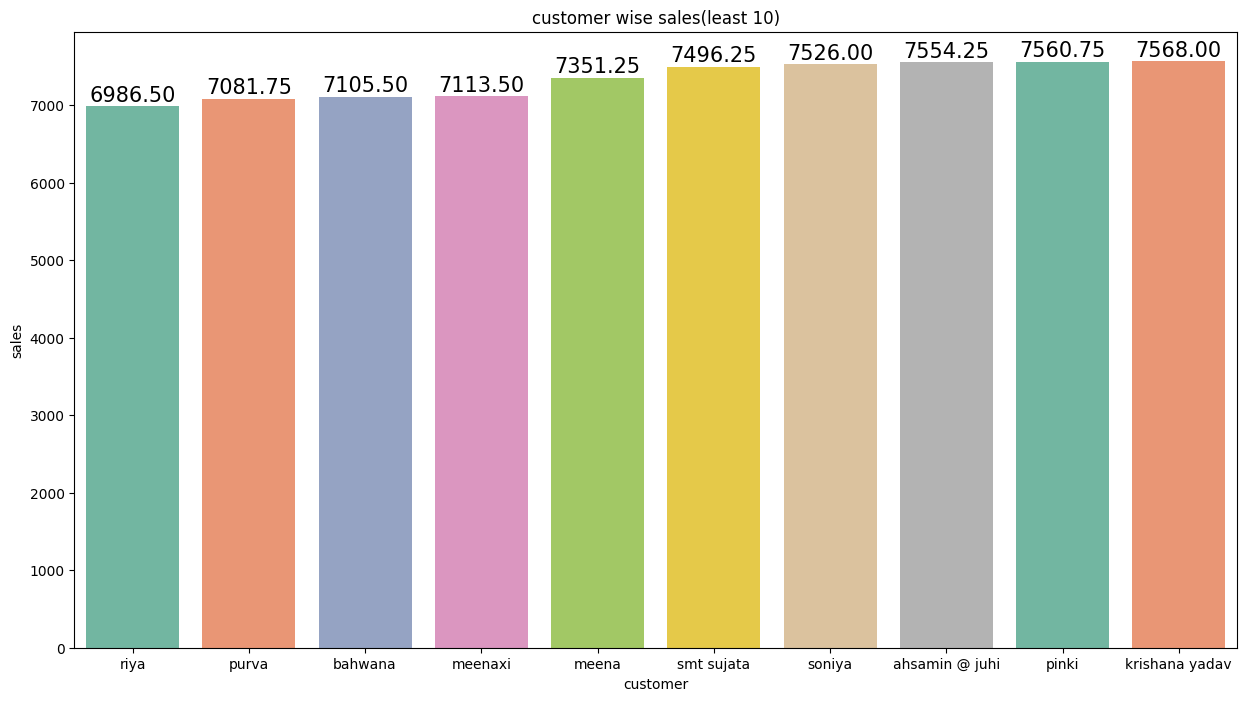

In [30]:
plt.figure(figsize=(15,8))
plots = sns.barplot(x=df_temp_2['name'],y=df_temp_2['sales'],palette="Set2")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0, 8),
                   textcoords='offset points')
    
                   
                  
plt.xlabel('customer')
plt.ylabel('sales')
plt.title('customer wise sales(least 10)')                        
plt.show()      

In [45]:
#bank wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.bank_name, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.trans_dim s on s.payment_key=t.payment_key " \
               "WHERE trans_type <> 'cash' "\
                "GROUP BY CUBE(s.bank_name) " \
                "ORDER BY s.bank_name "
cur.execute(select_stmt)
bank_wise_records = cur.fetchall()

successfully connected to database


In [46]:
bank_wise_records


[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [47]:
bank = pd.DataFrame(bank_wise_records, columns=['bank_name', 'sales'])
bank

,bank_name,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [49]:
bank =bank.drop(38)
bank

,bank_name,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [50]:
changetype(bank)

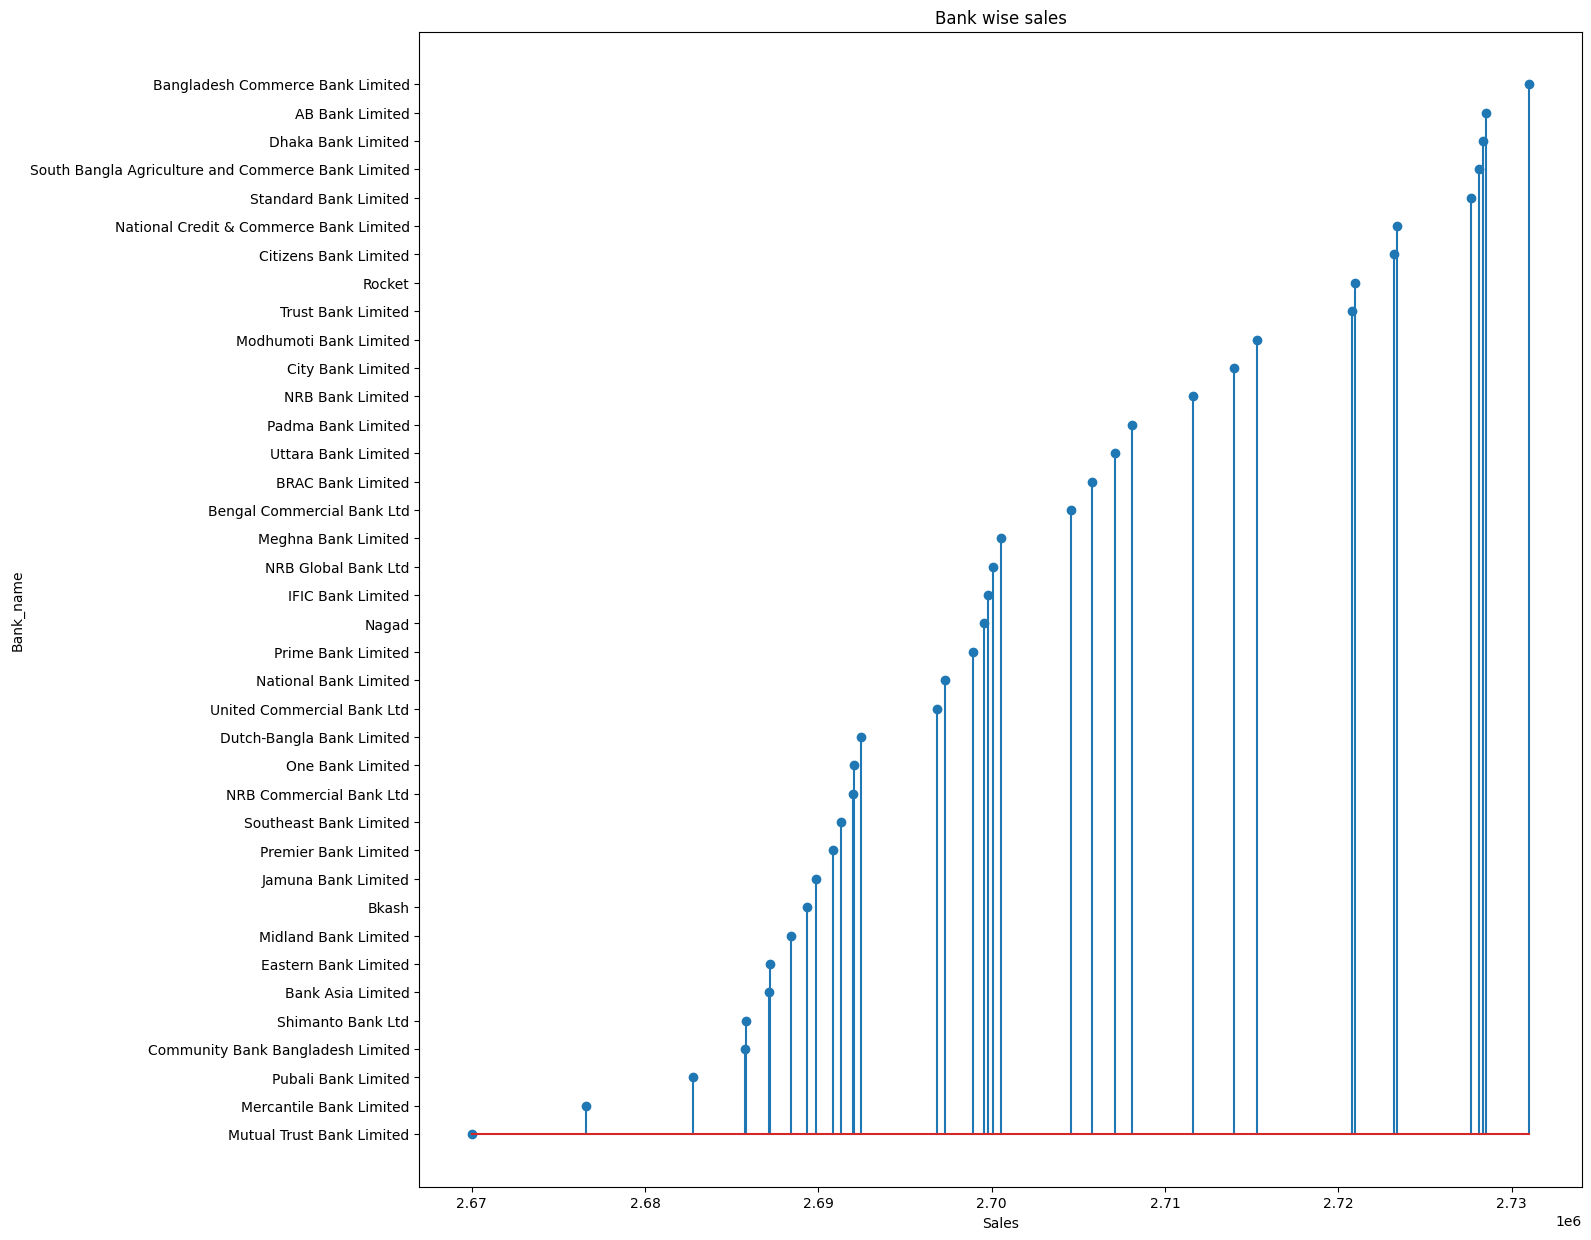

In [53]:
plt.figure(figsize=(15,15))
df_bank = bank
df_bank.sort_values(by=['sales'],inplace=True,ascending=True)
plt.xlabel('Sales')
plt.ylabel('Bank_name')
plt.title('Bank wise sales')
plt.stem(df_bank['sales'],df_bank['bank_name'])
plt.show()

In [56]:
#transaction wise
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.trans_type, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.trans_dim s on s.payment_key=t.payment_key " \
              "GROUP BY CUBE(s.trans_type) " \
              "ORDER BY s.trans_type "
cur.execute(select_stmt)
transaction_wise_records = cur.fetchall()

successfully connected to database


In [57]:
transaction_wise_records

[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

In [58]:
trans = pd.DataFrame(transaction_wise_records, columns=['trans_type', 'sales'])
trans

,trans_type,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50
3,None,105401435.75


In [59]:
trans =trans.drop(3)
trans

,trans_type,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


In [61]:
changetype(trans)

In [64]:
trans=trans.set_index(['trans_type'])
trans

,sales
trans_type,
card,94583038.50
cash,2708515.75
mobile,8109881.50


<Axes: ylabel='sales'>

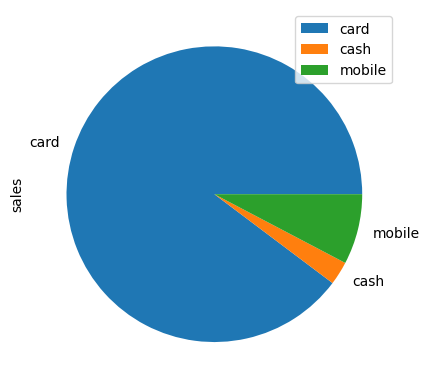

In [66]:
trans.plot.pie(y='sales')

# Q3.Total sales in Barisal

In [68]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.store_dim s on s.store_key=t.store_key " \
              "WHERE s.division = 'BARISAL' "\
              "GROUP BY CUBE(s.division) "
cur.execute(select_stmt)
record_q3 = cur.fetchall()

successfully connected to database


In [69]:
record_q3

[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [71]:
df_q3 = pd.DataFrame(record_q3, columns=['division', 'sales'])
df_q3

,division,sales
0,BARISAL,7520343.75
1,None,7520343.75


In [73]:
df_q3 =df_q3.drop(1)
df_q3

,division,sales
0,BARISAL,7520343.75


# Q4.Total sales in 2015

In [76]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.time_dim s on s.time_key=t.time_key " \
              "WHERE s.year = 2015 "\
              "GROUP BY CUBE(s.year) "
cur.execute(select_stmt)
record_q4 = cur.fetchall()

successfully connected to database


In [77]:
record_q4

[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [78]:
df_q4 = pd.DataFrame(record_q4, columns=['division', 'sales'])
df_q4

,division,sales
0,2015.0,15095720.25
1,NaN,15095720.25


In [79]:
df_q4 =df_q4.drop(1)
df_q4

,division,sales
0,2015.0,15095720.25


# Q5.Total sales of Barisal in 2015


In [88]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT st.division,td.year, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.store_dim st on st.store_key=t.store_key " \
              "JOIN ecombd_star_schema.time_dim td on td.time_key=t.time_key " \
              "WHERE st.division = 'BARISAL' and td.year = 2015  "\
              "GROUP BY CUBE(st.division,td.year) "
cur.execute(select_stmt)
record_q5 = cur.fetchall()

successfully connected to database


In [90]:
record_q5

[('BARISAL', 2015, Decimal('1076902.75')),
 ('BARISAL', None, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75')),
 (None, 2015, Decimal('1076902.75'))]

In [92]:
df_q5 = pd.DataFrame(record_q5, columns=['division','year', 'sales'])
df_q5

,division,year,sales
0,BARISAL,2015.0,1076902.75
1,BARISAL,NaN,1076902.75
2,None,NaN,1076902.75
3,None,2015.0,1076902.75


In [93]:
df_q5 =df_q5.drop(3)
df_q5 =df_q5.drop(2)
df_q5 =df_q5.drop(1)

df_q5

,division,year,sales
0,BARISAL,2015.0,1076902.75


In [95]:
df_q5.dtypes

division     object
year        float64
sales        object
dtype: object

# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

In [113]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT st.store_key,it.item_name, SUM(t.quantity) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.store_dim st on st.store_key=t.store_key " \
              "JOIN ecombd_star_schema.item_dim it on it.item_key=t.item_key " \
              "GROUP BY CUBE(st.store_key,it.item_name) "\
              "ORDER BY st.store_key asc, SUM(t.quantity) desc "


cur.execute(select_stmt)
record_q6 = cur.fetchall()

successfully connected to database


In [114]:
record_q6


[('S0001', None, Decimal('8169')),
 ('S0001', 'Pepsi - 12 oz cans', Decimal('92')),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', Decimal('90')),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', Decimal('78')),
 ('S0001', 'Waterloo Sparkling Lime 12oz', Decimal('70')),
 ('S0001', 'Njoy Sugar Canister 22 oz', Decimal('69')),
 ('S0001', 'Vita Coconut Water 10oz ', Decimal('68')),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', Decimal('67')),
 ('S0001', 'Sprite - 12 oz cans', Decimal('64')),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', Decimal('63')),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', Decimal('62')),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', Decimal('61')),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', Decimal('60')),
 ('S0001', 'A&W Root Beer - 12 oz cans', Decimal('60')),
 ('S0001', 'Dark Chocolate Mint Patties', Decimal('60')),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', Decimal('59')),
 ('S0001', 'Large Trash Bags Black 33 gal', De

In [124]:
df_q6 = pd.DataFrame(record_q6, columns=['store_key','item_name', 'quantity'])
df_q6

,store_key,item_name,quantity
0,S0001,None,8169
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
...,...,...,...
188095,None,Dole Fruit in Gel Cups 4.3 oz,21818
188096,None,La Croix Sparkling Orange 12 oz,21817
188097,None,Hershey Factory Favorites Mix,21741
188098,None,Monster Java 15 oz,21698


In [125]:
df_q6 = df_q6.dropna()
df_q6

,store_key,item_name,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
5,S0001,Njoy Sugar Canister 22 oz,69
...,...,...,...
187835,S0099,Kind Bars Mini Variety Pack 0.7 oz,5
187836,S0099,Paper Plates 8.5 inch Ultra Strong,4
187837,S0099,Fuze Iced Tea,4
187838,S0099,Pringles Snak Stacks Variety,3


In [126]:
top3_of_each_store = df_q6.groupby('store_key').head(3)
top3_of_each_store = top3_of_each_store.head(24)
top3_of_each_store


,store_key,item_name,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
261,S0002,Muscle Milk Protein Shake Van. 11oz,78
518,S0003,Sprite - 12 oz cans,122
519,S0003,Diet Coke - 12 oz cans,109
520,S0003,Muscle Milk Protein Shake Van. 11oz,76
777,S0004,Kind Bars Variety Pack 1.4 oz,79


In [118]:
top3_of_each_store.dtypes

store_key    object
item_name    object
quantity     object
dtype: object

In [127]:
top3_of_each_store['quantity']=top3_of_each_store['quantity'].astype('int64')  

In [128]:
top3_of_each_store.dtypes

store_key    object
item_name    object
quantity      int64
dtype: object

<Axes: title={'center': 'Store wise top 3 sales'}, xlabel='store_key', ylabel='quantity'>

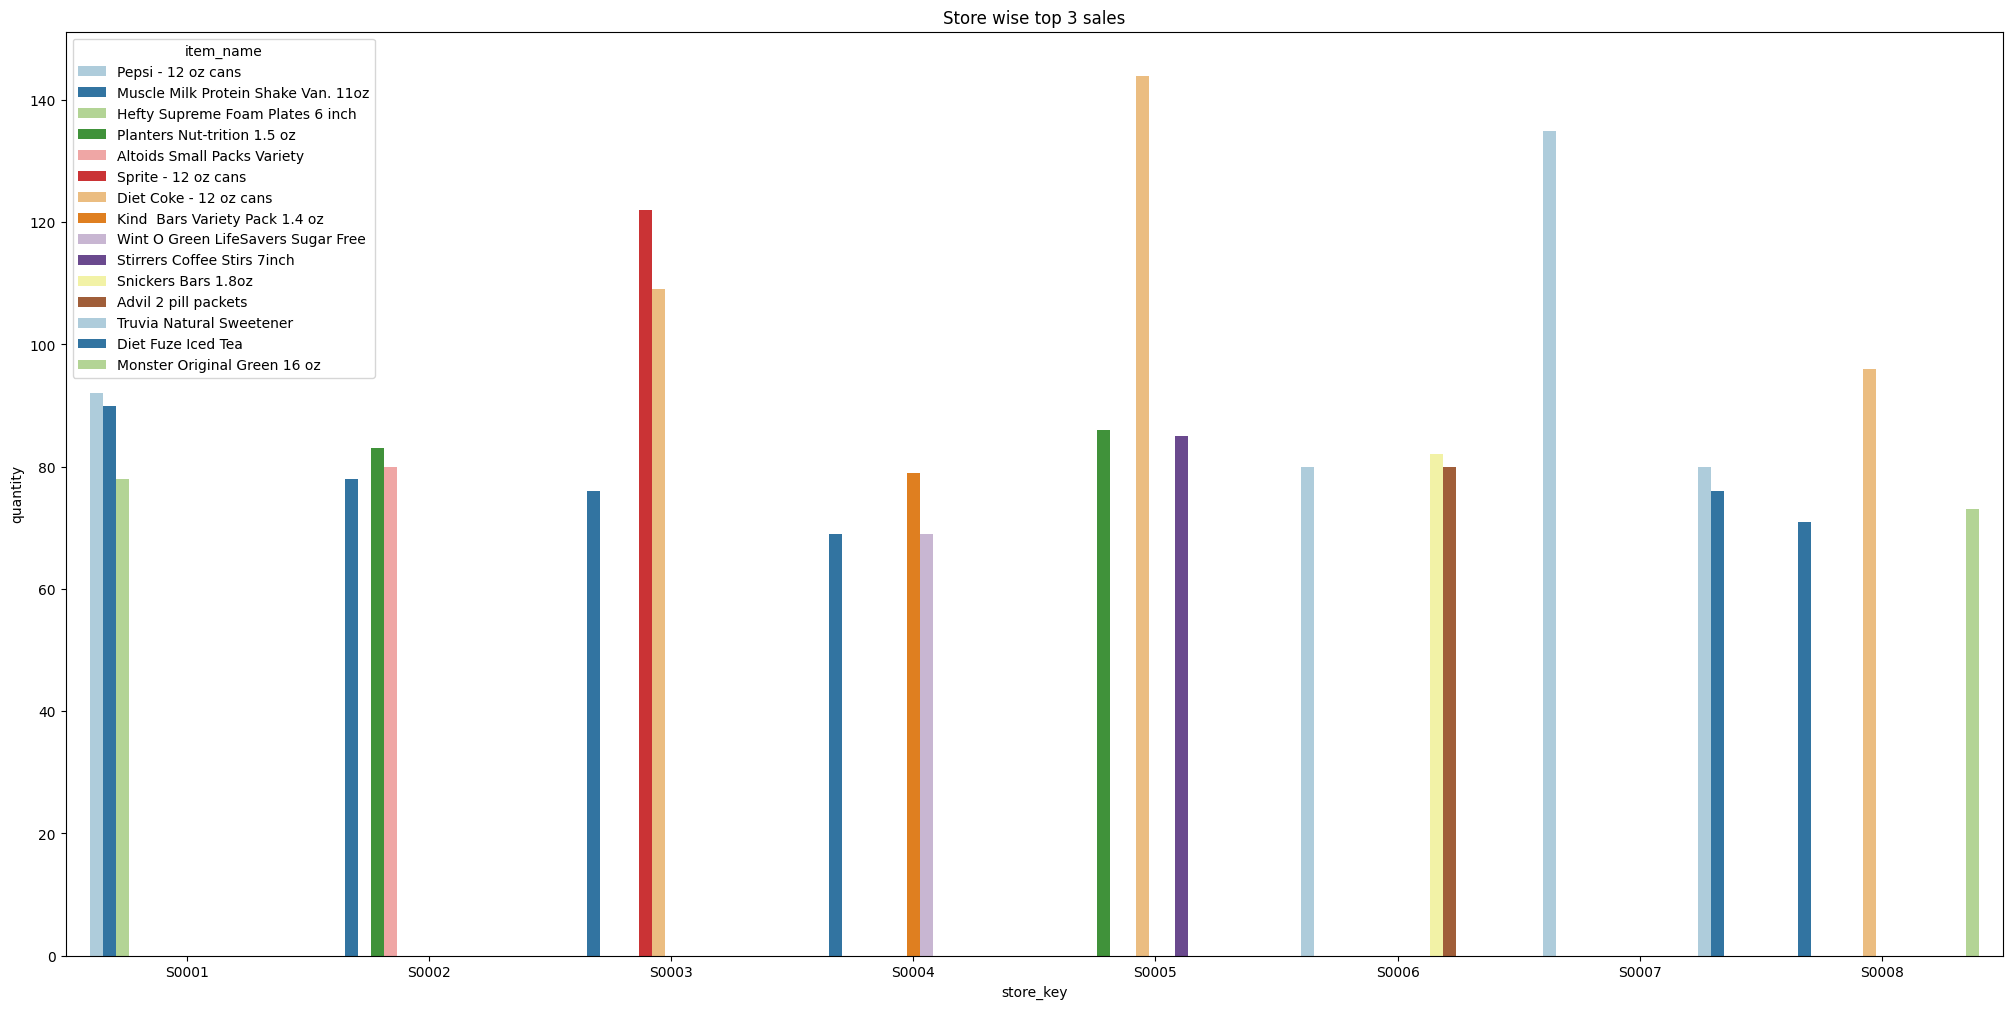

In [129]:
dims = (25,12)
fig,ax = plt.subplots(figsize=dims)
plt.xlabel('store_id')
plt.ylabel('quantity')
plt.title('Store wise top 3 sales')
sns.barplot(x = top3_of_each_store['store_key'],y=top3_of_each_store['quantity'],hue=top3_of_each_store['item_name'],ax=ax,palette='Paired')


# Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [140]:
#Enter more than 1000
num_of_days=input('Enter num of days:')

Enter num of days:1005


In [143]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt1 = "SELECT tm.date,it.item_name,tr.trans_type " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=t.time_key " \
              "JOIN ecombd_star_schema.item_dim it on it.item_key=t.item_key " \
              "JOIN ecombd_star_schema.trans_dim tr on tr.payment_key=t.payment_key " \
              "WHERE (tr.trans_type = 'card' or tr.trans_type='mobile' ) and tm.date > (CURRENT_DATE - INTERVAL"
stmt2 = " '"+str(num_of_days)+" day')"
select_stmt = stmt1 + stmt2

cur.execute(select_stmt)
record_q7 = cur.fetchall()


successfully connected to database


In [144]:
record_q7

[(datetime.date(2021, 1, 9), 'Cheez It White Cheddar 1.5 oz', 'card'),
 (datetime.date(2020, 10, 20), 'Hazelnut International Delight', 'card'),
 (datetime.date(2020, 8, 24), 'Ice Breaker Mints Sugar Free ', 'card'),
 (datetime.date(2020, 10, 18), 'Coke Zero Sugar 12 oz cans', 'card'),
 (datetime.date(2021, 1, 3), 'Coke Zero Sugar 12 oz cans', 'card'),
 (datetime.date(2020, 9, 13), 'Red Bull Sugar Free 8.4 oz', 'card'),
 (datetime.date(2021, 1, 4), "Kellogg's Cereals Assortment Pack ", 'card'),
 (datetime.date(2020, 11, 2), 'Fresca Black Cherry - 12 oz cans', 'mobile'),
 (datetime.date(2020, 11, 2), 'Sargento String Cheese 0.75oz', 'card'),
 (datetime.date(2020, 10, 29), 'Brisk Lemon Iced Tea - 12 oz cans', 'card'),
 (datetime.date(2020, 10, 20), 'Pure White Sugar Packets', 'card'),
 (datetime.date(2020, 10, 6), 'Stirrers Coffee Stirs 7inch', 'card'),
 (datetime.date(2021, 1, 9), 'Dole Fruit in Gel Cups 4.3 oz', 'card'),
 (datetime.date(2021, 1, 16), 'Waterloo Sparkling Grapefruit 12oz

In [145]:
df_q7 = pd.DataFrame(record_q7, columns=['date','item_name', 'trans_type'])
df_q7

,date,item_name,trans_type
0,2021-01-09,Cheez It White Cheddar 1.5 oz,card
1,2020-10-20,Hazelnut International Delight,card
2,2020-08-24,Ice Breaker Mints Sugar Free,card
3,2020-10-18,Coke Zero Sugar 12 oz cans,card
4,2021-01-03,Coke Zero Sugar 12 oz cans,card
...,...,...,...
59516,2020-11-29,Quaker Instant Oatmeal Maple Brn Sugar,card
59517,2020-11-20,Sprite - 12 oz cans,card
59518,2020-11-10,Tootsie Roll Midgets,card
59519,2020-12-23,Muscle Milk Protein Shake Van. 11oz,card


In [146]:
items = df_q7['item_name'].values.tolist()
items

['Cheez It White Cheddar 1.5 oz',
 'Hazelnut International Delight',
 'Ice Breaker Mints Sugar Free ',
 'Coke Zero Sugar 12 oz cans',
 'Coke Zero Sugar 12 oz cans',
 'Red Bull Sugar Free 8.4 oz',
 "Kellogg's Cereals Assortment Pack ",
 'Fresca Black Cherry - 12 oz cans',
 'Sargento String Cheese 0.75oz',
 'Brisk Lemon Iced Tea - 12 oz cans',
 'Pure White Sugar Packets',
 'Stirrers Coffee Stirs 7inch',
 'Dole Fruit in Gel Cups 4.3 oz',
 'Waterloo Sparkling Grapefruit 12oz',
 'Stirrers Coffee Stirs 7inch',
 'La Croix Sparkling Grapefruit 12 oz',
 'K Cups Daily Chef Columbian Supremo',
 'Sugar in the Raw Packets',
 'Njoy Sugar Canister 22 oz',
 'Famous Amos Cookies ',
 'Extra Variety Packs Sugar Free',
 'Bounty Paper Towels Select a Size ',
 'Cascade Gel w/ Dawn Dishwasher',
 'Sunkist Orange - 12 oz cans',
 'Clorox Disinfecting Wipes ',
 'Jolly Ranchers Variety Hard Candy',
 'Brisk Lemon Iced Tea - 12 oz cans',
 'Paper Plates 7 inch  Ultra Strong',
 'Waterloo Sparkling Mango 12oz',
 'M&M 

In [149]:
con = PostgresConnection().getConnection()
cur = con.cursor()
stmt1 = "SELECT tr.trans_type,COUNT(it.item_name) as total_items " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=t.time_key " \
              "JOIN ecombd_star_schema.item_dim it on it.item_key=t.item_key " \
              "JOIN ecombd_star_schema.trans_dim tr on tr.payment_key=t.payment_key " \
              "WHERE (tr.trans_type = 'card' or tr.trans_type='mobile' ) and tm.date > (CURRENT_DATE - INTERVAL"
stmt2 = " '"+str(num_of_days)+" day') GROUP BY (tr.trans_type)"
select_stmt = stmt1 + stmt2

cur.execute(select_stmt)
record_q7_2 = cur.fetchall()


successfully connected to database


In [148]:
record_q7_2

[('card', 54772), ('mobile', 4749)]

In [152]:
df_q7_2 = pd.DataFrame(record_q7_2, columns=['trans_type','total_items'])
df_q7_2.dtypes

trans_type     object
total_items     int64
dtype: object

In [153]:
df_q7_2=df_q7_2.set_index(['trans_type'])
df_q7_2

,total_items
trans_type,
card,54772
mobile,4749


<Axes: ylabel='total_items'>

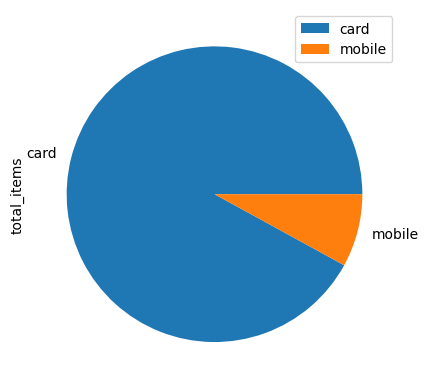

In [155]:
df_q7_2.plot.pie(y='total_items')

# Q8.What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [7]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT it.item_name,tm.quarter, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=t.time_key " \
              "JOIN ecombd_star_schema.item_dim it on it.item_key=t.item_key " \
              "GROUP BY CUBE(it.item_name,tm.quarter) "\
              "ORDER BY it.item_name,SUM(t.total_price)  "


cur.execute(select_stmt)
record_q8 = cur.fetchall()

successfully connected to database


In [8]:
record_q8

[('100% Juice Box Variety 6.75 oz ', 'Q1', Decimal('85470.0')),
 ('100% Juice Box Variety 6.75 oz ', 'Q4', Decimal('87090.0')),
 ('100% Juice Box Variety 6.75 oz ', 'Q2', Decimal('88140.0')),
 ('100% Juice Box Variety 6.75 oz ', 'Q3', Decimal('90675.0')),
 ('100% Juice Box Variety 6.75 oz ', None, Decimal('351375.0')),
 ('A&W Root Beer - 12 oz cans', 'Q2', Decimal('65952.5')),
 ('A&W Root Beer - 12 oz cans', 'Q4', Decimal('66930.0')),
 ('A&W Root Beer - 12 oz cans', 'Q1', Decimal('68597.5')),
 ('A&W Root Beer - 12 oz cans', 'Q3', Decimal('70184.5')),
 ('A&W Root Beer - 12 oz cans', None, Decimal('271664.5')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q4', Decimal('37725.75')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q2', Decimal('37982.25')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q3', Decimal('40095.00')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q1', Decimal('40675.50')),
 ('A&W Root Beer Diet - 12 oz cans', None, Decimal('156478.50')),
 ('Advil 2 pill packets', 'Q1', Decimal('76342.0')),
 ('A

In [9]:
df_q8= pd.DataFrame(record_q8, columns=['item_name','quarter','total_price'])
df_q8


,item_name,quarter,total_price
0,100% Juice Box Variety 6.75 oz,Q1,85470.0
1,100% Juice Box Variety 6.75 oz,Q4,87090.0
2,100% Juice Box Variety 6.75 oz,Q2,88140.0
3,100% Juice Box Variety 6.75 oz,Q3,90675.0
4,100% Juice Box Variety 6.75 oz,None,351375.0
...,...,...,...
1295,None,Q1,26055273.50
1296,None,Q2,26139490.25
1297,None,Q4,26506290.25
1298,None,Q3,26700381.75


In [14]:
df_q8 = df_q8.dropna()

df_q8

,item_name,quarter,total_price
0,100% Juice Box Variety 6.75 oz,Q1,85470.0
1,100% Juice Box Variety 6.75 oz,Q4,87090.0
2,100% Juice Box Variety 6.75 oz,Q2,88140.0
3,100% Juice Box Variety 6.75 oz,Q3,90675.0
5,A&W Root Beer - 12 oz cans,Q2,65952.5
...,...,...,...
1288,Yoplait Original Yogurt Variety Pack,Q3,69132.0
1290,Zoo Animal Cookies/Crackers,Q1,76468.0
1291,Zoo Animal Cookies/Crackers,Q2,77112.0
1292,Zoo Animal Cookies/Crackers,Q4,77280.0


In [11]:
df_q8['total_price']=df_q8['total_price'].astype('float64')  

In [12]:
df_q8.dtypes

item_name       object
quarter         object
total_price    float64
dtype: object

In [20]:
worst_season = df_q8.groupby('item_name').head(1)
worst_season

#top3_of_each_store = top3_of_each_store.head(24)
#top3_of_each_store

,item_name,quarter,total_price
0,100% Juice Box Variety 6.75 oz,Q1,85470.00
5,A&W Root Beer - 12 oz cans,Q2,65952.50
10,A&W Root Beer Diet - 12 oz cans,Q4,37725.75
15,Advil 2 pill packets,Q1,76342.00
20,All Purpose Cleaner 409 Spray,Q1,95850.00
...,...,...,...
1270,Welch's 100% Juice Variety10 oz,Q2,93398.00
1275,Wint O Green LifeSavers Sugar Free,Q1,85168.00
1280,Wonderful Pistachios (in shell),Q1,122716.00
1285,Yoplait Original Yogurt Variety Pack,Q1,65112.00


In [21]:
worst_season_top20 = worst_season[0:20]
worst_season_top20

,item_name,quarter,total_price
0,100% Juice Box Variety 6.75 oz,Q1,85470.00
5,A&W Root Beer - 12 oz cans,Q2,65952.50
10,A&W Root Beer Diet - 12 oz cans,Q4,37725.75
15,Advil 2 pill packets,Q1,76342.00
20,All Purpose Cleaner 409 Spray,Q1,95850.00
25,Altoids Small Packs Variety,Q3,65592.00
30,Apple Sauce Variety GoGO Squeeze 3.2oz,Q4,78190.00
35,AquaFina Purified Drinking Water 16oz,Q1,47691.00
40,Austin Cookie Cracker Variety,Q1,78358.00
45,Austin Toasty Crackers w/ PBtr,Q2,73836.00


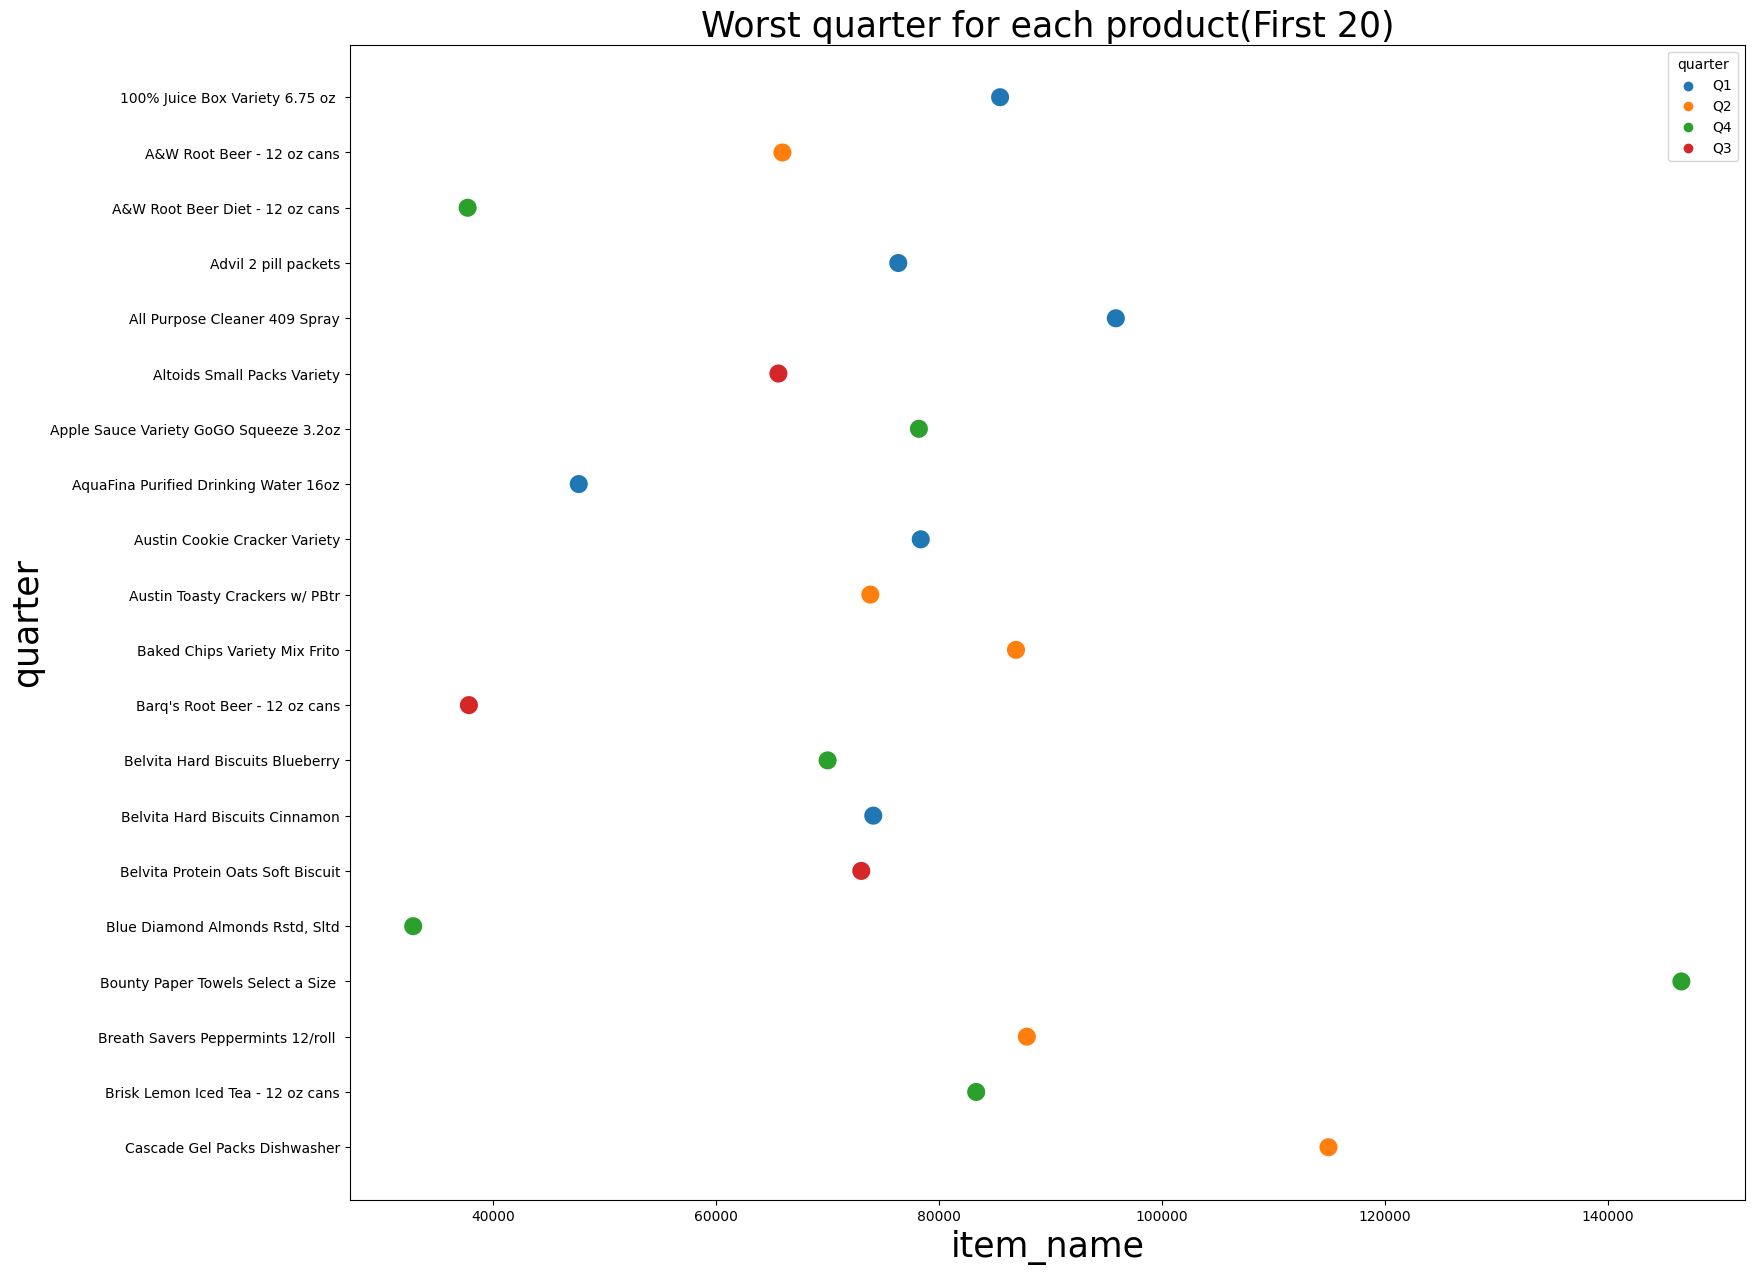

In [27]:
plt.figure(figsize=(18,15))

sns.scatterplot(data=worst_season_top20,x='total_price',y='item_name',hue='quarter',palette="tab10",s=200)                  
plt.xlabel('item_name',fontsize=25)
plt.ylabel('quarter',fontsize=25)
plt.title('Worst quarter for each product(First 20)',fontsize=25)                        
plt.show()      

# Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [51]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT it.item_name,st.division, SUM(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.store_dim st on st.store_key=t.store_key " \
              "JOIN ecombd_star_schema.item_dim it on it.item_key=t.item_key " \
              "GROUP BY CUBE(it.item_name,st.division) "\
              "ORDER BY it.item_name  "


cur.execute(select_stmt)
record_q9 = cur.fetchall()

successfully connected to database


In [35]:
record_q9

[('100% Juice Box Variety 6.75 oz ', 'KHULNA', Decimal('37755.0')),
 ('100% Juice Box Variety 6.75 oz ', None, Decimal('351375.0')),
 ('100% Juice Box Variety 6.75 oz ', 'BARISAL', Decimal('23790.0')),
 ('100% Juice Box Variety 6.75 oz ', 'SYLHET', Decimal('18270.0')),
 ('100% Juice Box Variety 6.75 oz ', 'CHITTAGONG', Decimal('64950.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RAJSHAHI', Decimal('38730.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RANGPUR', Decimal('26685.0')),
 ('100% Juice Box Variety 6.75 oz ', 'DHAKA', Decimal('141195.0')),
 ('A&W Root Beer - 12 oz cans', 'DHAKA', Decimal('107479.0')),
 ('A&W Root Beer - 12 oz cans', 'BARISAL', Decimal('19101.5')),
 ('A&W Root Beer - 12 oz cans', 'CHITTAGONG', Decimal('52060.5')),
 ('A&W Root Beer - 12 oz cans', 'SYLHET', Decimal('15249.0')),
 ('A&W Root Beer - 12 oz cans', None, Decimal('271664.5')),
 ('A&W Root Beer - 12 oz cans', 'RANGPUR', Decimal('21597.0')),
 ('A&W Root Beer - 12 oz cans', 'KHULNA', Decimal('28382.0')),
 ('A&W 

In [52]:
df_q9= pd.DataFrame(record_q9, columns=['item_name','division','Sale'])
df_q9


,item_name,division,Sale
0,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
1,100% Juice Box Variety 6.75 oz,None,351375.0
2,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
3,100% Juice Box Variety 6.75 oz,SYLHET,18270.0
4,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
...,...,...,...
2075,None,CHITTAGONG,19763595.00
2076,None,KHULNA,11311610.50
2077,None,BARISAL,7520343.75
2078,None,None,105401435.75


In [57]:
df_q9= df_q9.dropna()
df_q9['Sale']=df_q9['Sale'].astype('float64')  
df_q9.dtypes

item_name     object
division      object
Sale         float64
dtype: object

In [73]:
top5_items = df_q9[0:49]
top5_items.dtypes


item_name     object
division      object
Sale         float64
dtype: object

<Axes: title={'center': 'division_wise sale(7 items)'}, xlabel='item_name', ylabel='Sale'>

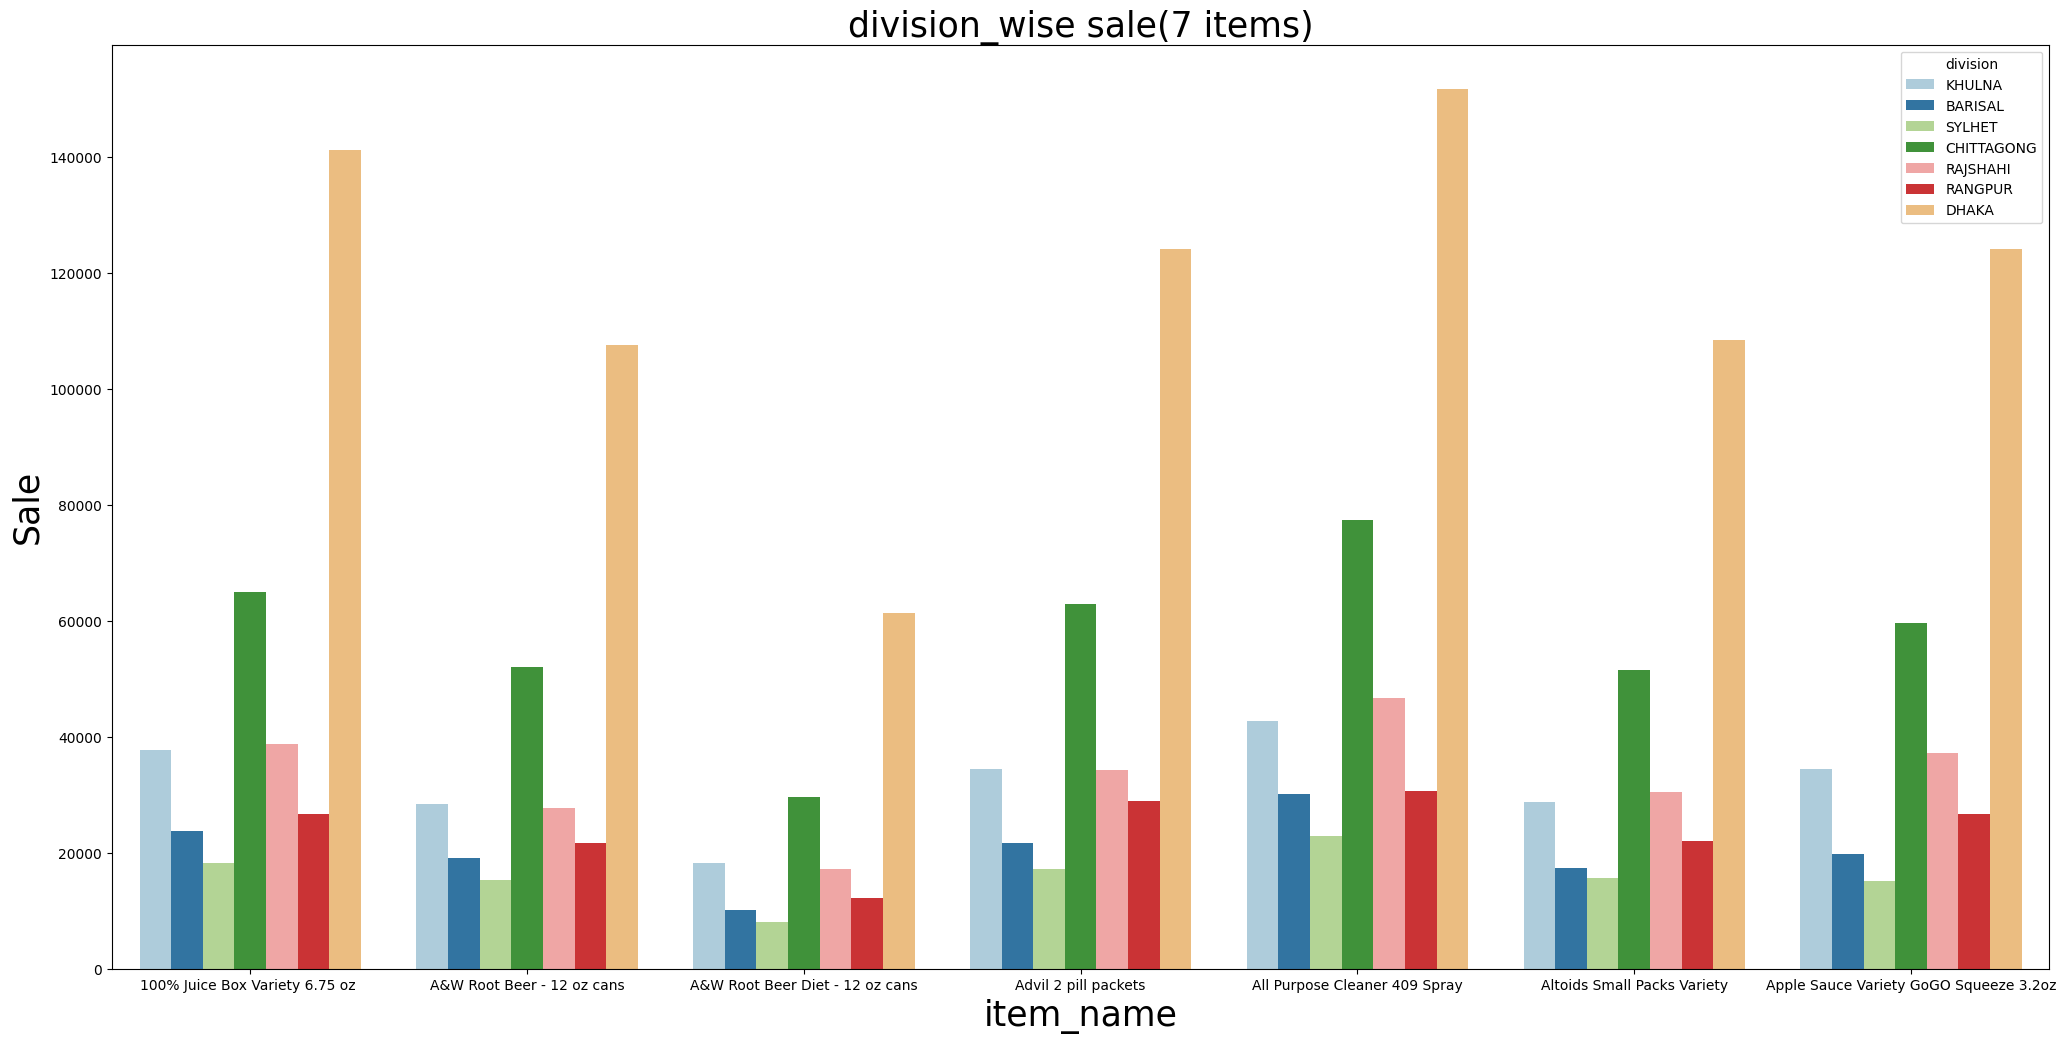

In [74]:
dims = (25,12)
fig,ax = plt.subplots(figsize=dims)
plt.xlabel('item_name',fontsize = 25)
plt.ylabel('Sale',fontsize = 25)
plt.title('division_wise sale(7 items)',fontsize = 25)
sns.barplot(x = top5_items['item_name'],y=top5_items['Sale'],hue=top5_items['division'],ax=ax,palette='Paired')


# Q10: What are the average sales of products sales per store monthly?

    S1->M1-> avg_sales

    s1-> M2 -> avg_sales

In [43]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT st.store_key,tm.month, avg(t.total_price) " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.store_dim st on st.store_key=t.store_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=t.time_key " \
              "GROUP BY CUBE(st.store_key,tm.month) "\
              "ORDER BY st.store_key,tm.month  "


cur.execute(select_stmt)
record_q10 = cur.fetchall()

successfully connected to database


In [44]:
record_q10

[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0001', 2, Decimal('100.5776699029126214')),
 ('S0001', 3, Decimal('109.4158878504672897')),
 ('S0001', 4, Decimal('98.8805309734513274')),
 ('S0001', 5, Decimal('99.5245535714285714')),
 ('S0001', 6, Decimal('101.2459349593495935')),
 ('S0001', 7, Decimal('103.9189189189189189')),
 ('S0001', 8, Decimal('105.1269531250000000')),
 ('S0001', 9, Decimal('96.1901041666666667')),
 ('S0001', 10, Decimal('104.6166666666666667')),
 ('S0001', 11, Decimal('103.8355855855855856')),
 ('S0001', 12, Decimal('107.8697478991596639')),
 ('S0001', None, Decimal('102.5407569141193595')),
 ('S0002', 1, Decimal('98.2902684563758389')),
 ('S0002', 2, Decimal('106.3849557522123894')),
 ('S0002', 3, Decimal('102.7565217391304348')),
 ('S0002', 4, Decimal('104.0798969072164948')),
 ('S0002', 5, Decimal('109.1587591240875912')),
 ('S0002', 6, Decimal('100.9268867924528302')),
 ('S0002', 7, Decimal('95.6513157894736842')),
 ('S0002', 8, Decimal('108.9462809917355

In [47]:
df_q10= pd.DataFrame(record_q10, columns=['store_key','month','avg_sale'])
df_q10

,store_key,month,avg_sale
0,S0001,1.0,97.7543103448275862
1,S0001,2.0,100.5776699029126214
2,S0001,3.0,109.4158878504672897
3,S0001,4.0,98.8805309734513274
4,S0001,5.0,99.5245535714285714
...,...,...,...
9446,None,9.0,105.4656137424143517
9447,None,10.0,105.5257301519569495
9448,None,11.0,105.9146828059985602
9449,None,12.0,105.6896222951285665


In [49]:
df_q10= df_q10.dropna()
df_q10.dtypes

store_key     object
month        float64
avg_sale      object
dtype: object

In [62]:
df_q10['avg_sale']=df_q10['avg_sale'].astype('float64')  
df_q10.dtypes

store_key     object
month        float64
avg_sale     float64
dtype: object

In [63]:
First5_store = df_q10[0:60]
First5_store

,store_key,month,avg_sale
0,S0001,1.0,97.754310
1,S0001,2.0,100.577670
2,S0001,3.0,109.415888
3,S0001,4.0,98.880531
4,S0001,5.0,99.524554
5,S0001,6.0,101.245935
6,S0001,7.0,103.918919
7,S0001,8.0,105.126953
8,S0001,9.0,96.190104
9,S0001,10.0,104.616667


<Axes: title={'center': 'Per month avg sale(5 stores)'}, xlabel='avg_sale', ylabel='store_key'>

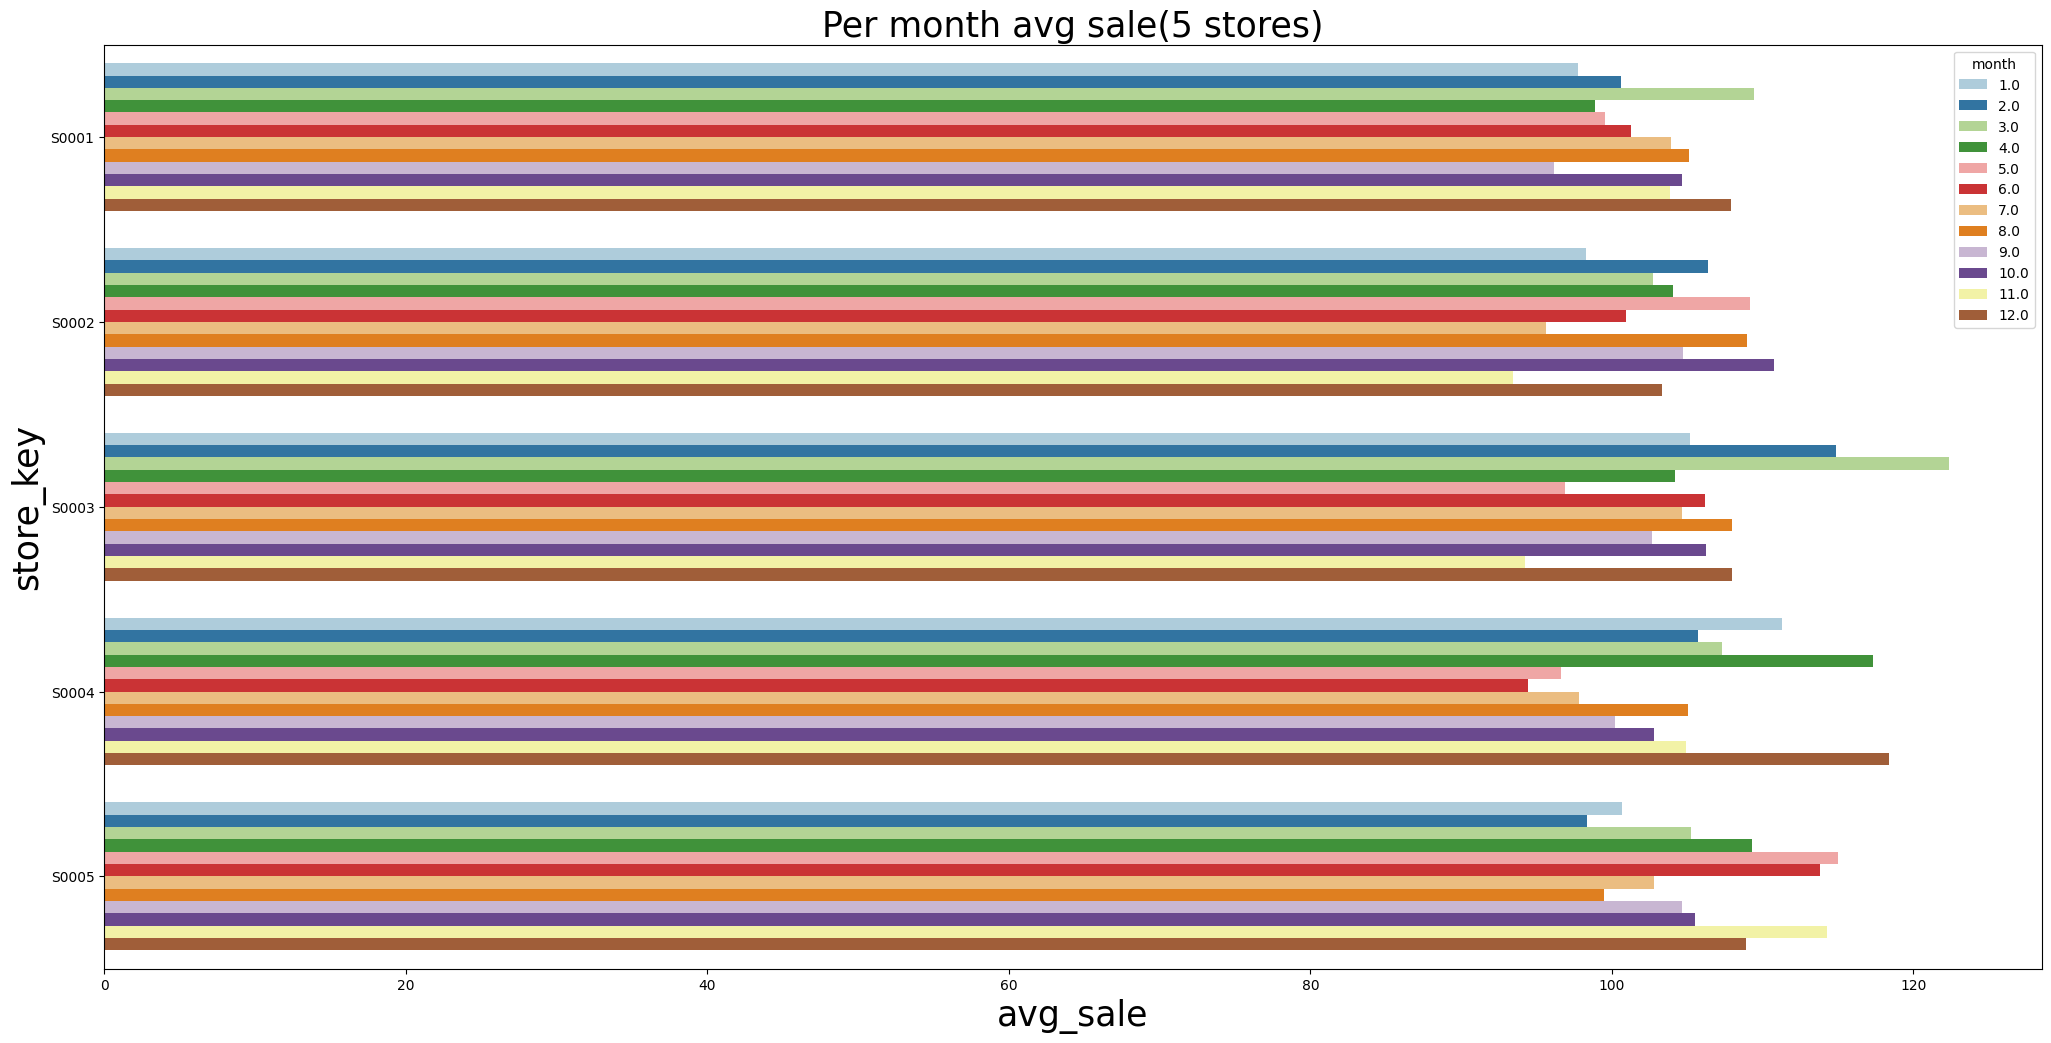

In [65]:
dims = (25,12)
fig,ax = plt.subplots(figsize=dims)
plt.xlabel('Avg_sale',fontsize = 25)
plt.ylabel('store_key',fontsize = 25)
plt.title('Per month avg sale(5 stores)',fontsize = 25)
sns.barplot(x = First5_store['avg_sale'],y=First5_store['store_key'],hue=First5_store['month'],ax=ax,palette='Paired')

<Axes: title={'center': 'month wise avg sale(3 stores)'}, xlabel='month', ylabel='avg_sale'>

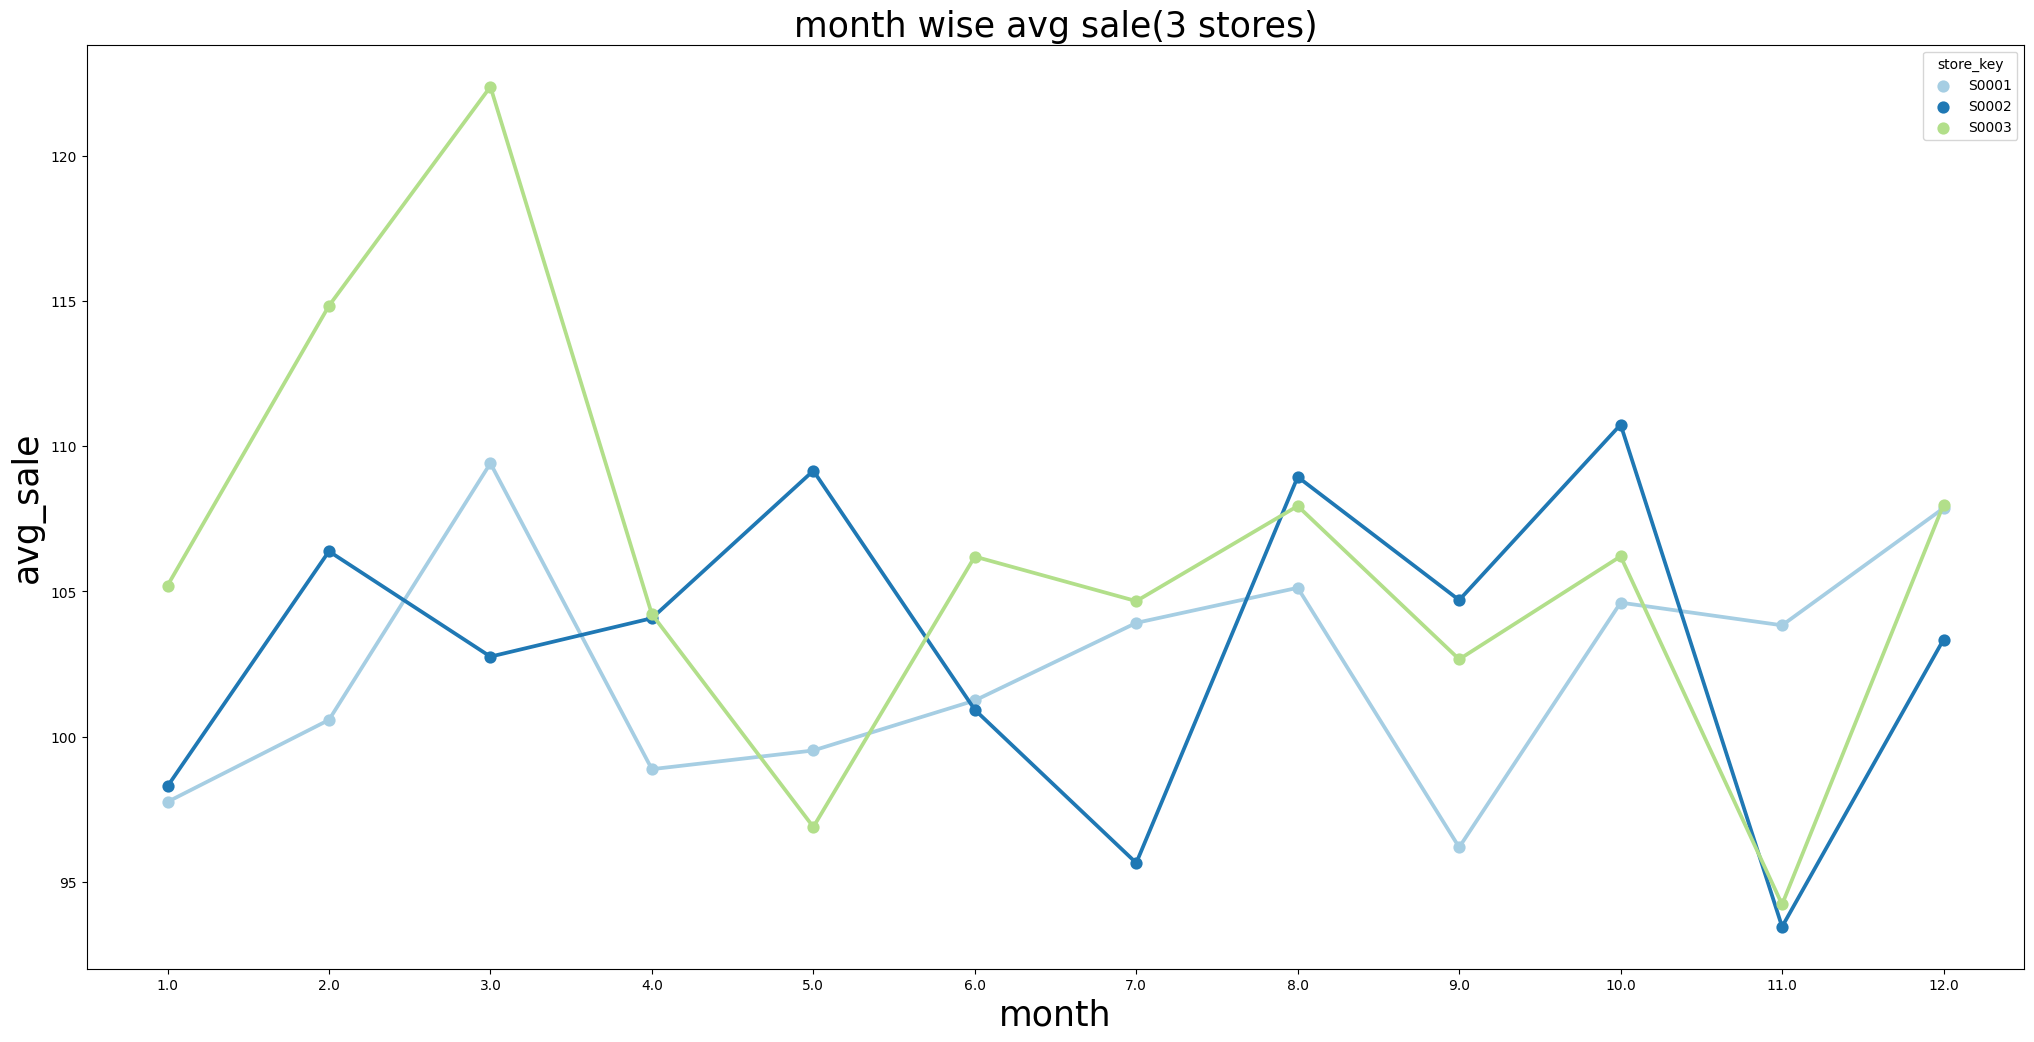

In [78]:
First5_store = df_q10[0:36]
dims = (25,12)
fig,ax = plt.subplots(figsize=dims)
plt.xlabel('month',fontsize = 25)
plt.ylabel('avg_sale',fontsize = 25)
plt.title('month wise avg sale(3 stores)',fontsize = 25)
sns.pointplot(data=First5_store,x='month',y='avg_sale',hue='store_key',ax=ax,palette='Paired')


# Please make a minimum of two decision questions for the following analytics:

1. store and time dimensional financial analytics,
2. customer and time dimensional financial analytics,
3. item and time dimensional financial analytics,
4. store and time dimensional inventory analytics,
5. item and time dimensional inventory analytics.

# 1.1) Find year wise total sales at "Khulna" division  

In [94]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tm.year,SUM(t.total_price) as total_sale " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.store_dim st on st.store_key=t.store_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=t.time_key " \
              "WHERE st.division = 'KHULNA' " \
              "GROUP BY CUBE(tm.year) "\
              "ORDER BY tm.year "


cur.execute(select_stmt)
record_q11 = cur.fetchall()

successfully connected to database


In [82]:
record_q11

[(2014, Decimal('1541362.75')),
 (2015, Decimal('1624721.25')),
 (2016, Decimal('1603501.75')),
 (2017, Decimal('1612215.00')),
 (2018, Decimal('1621000.50')),
 (2019, Decimal('1603156.25')),
 (2020, Decimal('1611895.00')),
 (2021, Decimal('93758.00')),
 (None, Decimal('11311610.50'))]

In [85]:
df_q11= pd.DataFrame(record_q11, columns=['year','total_sale'])

df_q11

,year,total_sale
0,2014.0,1541362.75
1,2015.0,1624721.25
2,2016.0,1603501.75
3,2017.0,1612215.00
4,2018.0,1621000.50
5,2019.0,1603156.25
6,2020.0,1611895.00
7,2021.0,93758.00
8,NaN,11311610.50


In [90]:
df_q11=df_q11.dropna()
df_q11.dtypes


year          float64
total_sale    float64
dtype: object

<Axes: title={'center': 'year wise sales in Khulna'}, xlabel='year', ylabel='total_sale'>

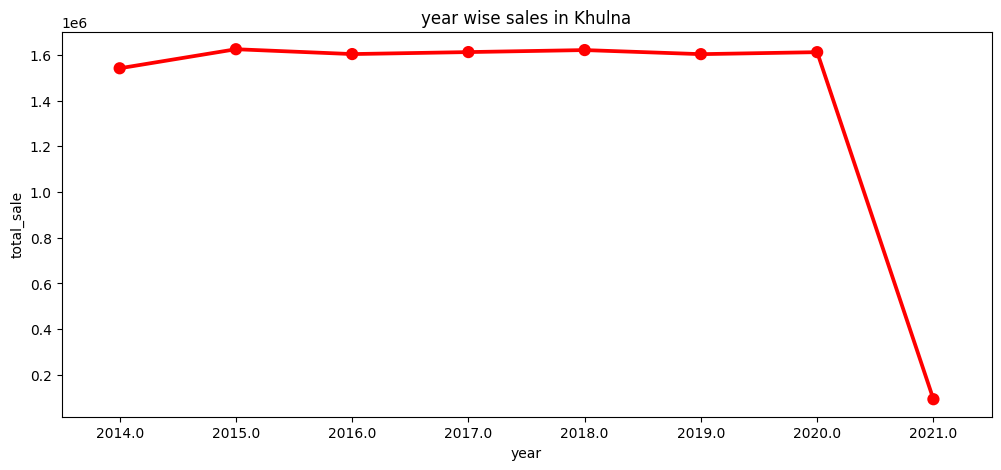

In [92]:
plt.figure(figsize=(12,5))
plt.xlabel('year')
plt.ylabel('sales')
plt.title('year wise sales in Khulna')
sns.pointplot(data=df_q11,x='year',y='total_sale',color='red')

# 1.2) Find the upazilla which has maximum sales in between 2016 to 2020

In [102]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT st.upazila,SUM(t.total_price) as Sale " \
              "FROM ecombd_star_schema.fact_table t " \
              "JOIN ecombd_star_schema.store_dim st on st.store_key=t.store_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=t.time_key " \
              "WHERE tm.year >= 2016 and tm.year <= 2020 " \
              "GROUP BY CUBE(st.upazila) "\
              "ORDER BY Sale desc "



cur.execute(select_stmt)
record_q12 = cur.fetchall()

successfully connected to database


In [103]:
record_q12

[(None, Decimal('75087212.00')),
 ('KOTWALI', Decimal('510871.00')),
 ('MOHAMMADPUR', Decimal('426652.25')),
 ('NAWABGANJ', Decimal('425020.25')),
 ('MIRPUR', Decimal('418523.50')),
 ('DAULATPUR', Decimal('406489.00')),
 ('KALIGANJ', Decimal('400724.75')),
 ('DAKSHINKHAN', Decimal('329335.25')),
 ('DURGAPUR', Decimal('322179.00')),
 ('KALABAGAN', Decimal('321489.50')),
 ('CHAK BAZAR', Decimal('320196.75')),
 ('DARUS SALAM', Decimal('319779.75')),
 ('GENDARIA', Decimal('319207.25')),
 ('PALLABI', Decimal('317335.75')),
 ('BANANI', Decimal('316811.75')),
 ('LALBAGH', Decimal('316479.25')),
 ('SHAHJAHANPUR', Decimal('314988.75')),
 ('MUGDA PARA', Decimal('314735.00')),
 ('WARI', Decimal('314442.25')),
 ('PALTAN', Decimal('314150.75')),
 ('KAFRUL', Decimal('313771.50')),
 ('UTTARA  PASCHIM', Decimal('313639.25')),
 ('BADDA', Decimal('313621.00')),
 ('SHAH ALI', Decimal('312939.50')),
 ('SUTRAPUR', Decimal('312356.00')),
 ('RAMNA', Decimal('311260.00')),
 ('TURAG', Decimal('311238.00')),
 (

In [105]:
df_q12= pd.DataFrame(record_q12, columns=['upazila','Sale'])

df_q12

,upazila,Sale
0,None,75087212.00
1,KOTWALI,510871.00
2,MOHAMMADPUR,426652.25
3,NAWABGANJ,425020.25
4,MIRPUR,418523.50
...,...,...
536,MADHUKHALI,93567.50
537,CHUNARUGHAT,93447.75
538,SHAHRASTI,93183.50
539,BAGHER PARA,92943.75


In [107]:
df_q12 = df_q12.dropna()
df_q12

,upazila,Sale
1,KOTWALI,510871.00
2,MOHAMMADPUR,426652.25
3,NAWABGANJ,425020.25
4,MIRPUR,418523.50
5,DAULATPUR,406489.00
...,...,...
536,MADHUKHALI,93567.50
537,CHUNARUGHAT,93447.75
538,SHAHRASTI,93183.50
539,BAGHER PARA,92943.75


In [122]:
print('Maximum sales in between 2016 to 2020 is ',f"{df_q12['Sale'].values[0]}",'tk in ',f"{df_q12['upazila'].values[0]}", 
      ' upazila' )

Maximum sales in between 2016 to 2020 is  510871.00 tk in  KOTWALI  upazila


# 2.1)Find the num of customers who consumed at least 2000 tk in 2019

In [144]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT count(customer_key) as total_count " \
              "FROM " \
              "(SELECT cus.customer_key, SUM(ft.total_price) as total_consumed " \
              "FROM ecombd_star_schema.fact_table ft " \
              "JOIN ecombd_star_schema.customer_dim cus on cus.customer_key=ft.customer_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE tm.year = 2019 "\
              "GROUP BY (cus.customer_key)) temp "\
              "where temp.total_consumed > 2000 "


cur.execute(select_stmt)
record_q13 = cur.fetchall()

successfully connected to database


In [145]:
record_q13

[(2118,)]

In [147]:
df_q13= pd.DataFrame(record_q13, columns=['total_count'])
df_q13

,total_count
0,2118


In [148]:
print("Total count: ",f"{df_q13['total_count'].values[0]}")

Total count:  2118


# 2.2) For each season(quarter) find the number of customers who consumed at most 3000 tk

In [154]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT temp.quarter, COUNT(temp.customer_key) as total_count " \
              "FROM " \
              "(SELECT tm.quarter,cus.customer_key, SUM(ft.total_price) as total_consumed "\
              "FROM ecombd_star_schema.fact_table ft " \
              "JOIN ecombd_star_schema.customer_dim cus on cus.customer_key=ft.customer_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "GROUP BY (tm.quarter,cus.customer_key) "\
              "ORDER BY tm.quarter,cus.customer_key ) temp "\
              "where temp.total_consumed <= 2500 "\
              "GROUP BY (temp.quarter) "\
              "ORDER BY temp.quarter "


cur.execute(select_stmt)
record_q14 = cur.fetchall()

successfully connected to database


In [155]:
record_q14

[('Q1', 3030), ('Q2', 2997), ('Q3', 2724), ('Q4', 2839)]

In [157]:
df_q14 = pd.DataFrame(record_q14, columns=['quarter','coustomer_count'])
df_q14.dtypes

quarter            object
coustomer_count     int64
dtype: object

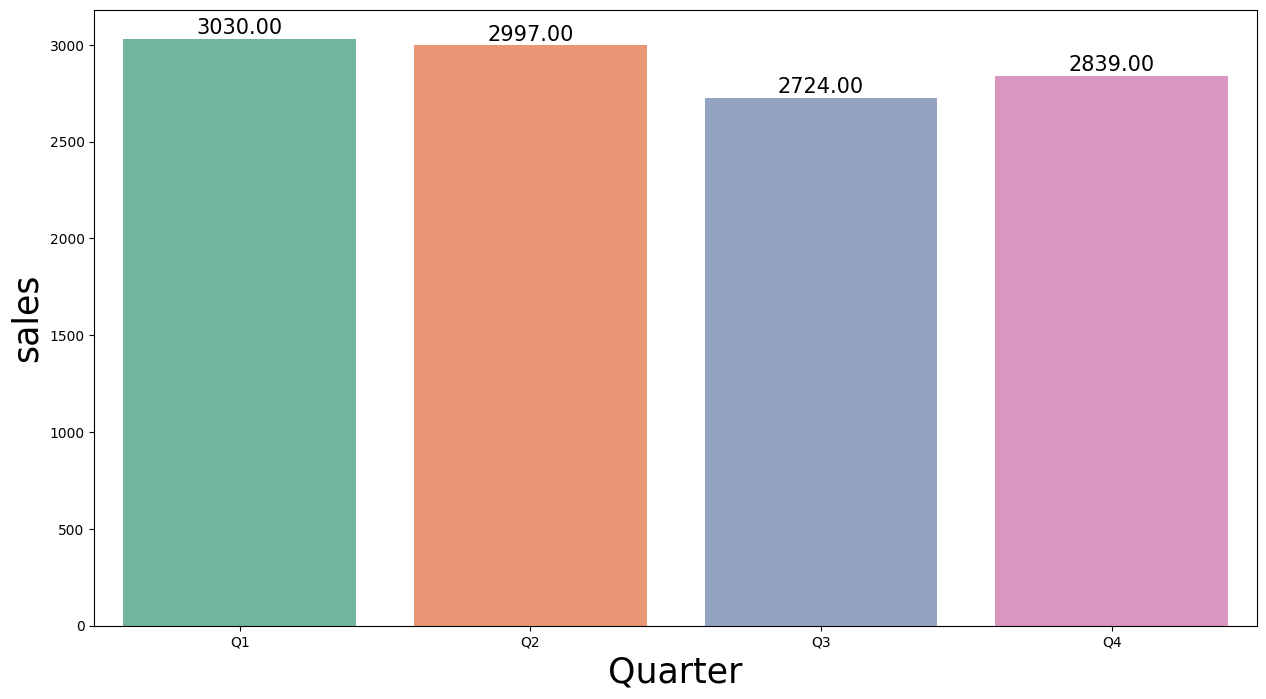

In [158]:
plt.figure(figsize=(15,8))
plots = sns.barplot(x=df_q14['quarter'],y=df_q14['coustomer_count'],palette="Set2")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0, 8),
                   textcoords='offset points')
    
                   
                  
plt.xlabel('Quarter',fontsize=25)
plt.ylabel('sales',fontsize=25)
plt.show()       

# 3.1) What is the Highest Sale product at 2018 ?

In [167]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT it.item_key,it.item_name,SUM(ft.total_price) as Sale " \
              "FROM ecombd_star_schema.fact_table ft " \
              "JOIN ecombd_star_schema.item_dim it on it.item_key=ft.item_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE tm.year = 2018 " \
              "GROUP BY CUBE(it.item_key,it.item_name) "\
              "ORDER BY Sale desc "



cur.execute(select_stmt)
record_q15 = cur.fetchall()

successfully connected to database


In [163]:
record_q15

[(None, None, Decimal('15108197.25')),
 ('I00061', 'Red Bull 12oz', Decimal('187605.0')),
 (None, 'Red Bull 12oz', Decimal('187605.0')),
 ('I00061', None, Decimal('187605.0')),
 (None, 'K Cups Original Donut Shop Med. Roast', Decimal('175801.0')),
 ('I00119', None, Decimal('175801.0')),
 ('I00115', None, Decimal('175801.0')),
 (None, 'K Cups Daily Chef Columbian Supremo', Decimal('175801.0')),
 ('I00119', 'K Cups Original Donut Shop Med. Roast', Decimal('175801.0')),
 ('I00115', 'K Cups Daily Chef Columbian Supremo', Decimal('175801.0')),
 ('I00116', 'K Cups Dunkin Donuts Medium Roast', Decimal('159504.0')),
 ('I00116', None, Decimal('159504.0')),
 (None, 'K Cups Dunkin Donuts Medium Roast', Decimal('159504.0')),
 ('I00123', 'Honey Packets  ', Decimal('157095.0')),
 (None, 'Honey Packets  ', Decimal('157095.0')),
 ('I00123', None, Decimal('157095.0')),
 (None, 'Muscle Milk Protein Shake Van. 11oz', Decimal('151612.0')),
 ('I00117', 'K Cups Folgers Lively Columbian', Decimal('147108.0')

In [169]:
df_q15 = pd.DataFrame(record_q15, columns=['item_key','item_name','Sale'])
df_q15 = df_q15.dropna()
df_q15


,item_key,item_name,Sale
1,I00061,Red Bull 12oz,187605.0
8,I00119,K Cups Original Donut Shop Med. Roast,175801.0
9,I00115,K Cups Daily Chef Columbian Supremo,175801.0
10,I00116,K Cups Dunkin Donuts Medium Roast,159504.0
13,I00123,Honey Packets,157095.0
...,...,...,...
775,I00076,Diet Fuze Iced Tea,20803.50
777,I00017,Fresca Black Cherry - 12 oz cans,20162.25
780,I00218,"Blue Diamond Almonds Rstd, Sltd",20112.0
783,I00099,Coffee-Mate Original Flavor Cold,20064.0


In [172]:
print('Highest Sale Product in 2018 is: "',f"{df_q15['item_name'].values[0]}",'" and total sale price: ',
      f"{df_q15['Sale'].values[0]}",' TK')

Highest Sale Product in 2018 is: " Red Bull 12oz " and total sale price:  187605.0  TK


# 3.2) Find the man_country wise total_sale_price of products from 2014 to 2017


In [175]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT it.man_country,SUM(ft.total_price) as Sale " \
              "FROM ecombd_star_schema.fact_table ft " \
              "JOIN ecombd_star_schema.item_dim it on it.item_key=ft.item_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE tm.year >= 2014 and  tm.year <= 2017 " \
              "GROUP BY CUBE(it.man_country) "\
              "ORDER BY it.man_country "



cur.execute(select_stmt)
record_q16 = cur.fetchall()

successfully connected to database


In [176]:
record_q16

[('Bangladesh', Decimal('7500128.75')),
 ('Cambodia', Decimal('5343428.75')),
 ('China', Decimal('3380881.00')),
 ('Finland', Decimal('5329980.75')),
 ('Germany', Decimal('6160195.75')),
 ('India', Decimal('7389754.25')),
 ('Lithuania', Decimal('6651801.00')),
 ('Netherlands', Decimal('5901516.75')),
 ('poland', Decimal('6177195.25')),
 ('United States', Decimal('5587883.50')),
 (None, Decimal('59422765.75'))]

In [181]:
df_q16 = pd.DataFrame(record_q16, columns=['Man_country','Sale'])
df_q16 = df_q16.dropna()
df_q16['Sale']=df_q16['Sale'].astype('float64')  

df_q16.dtypes

Man_country     object
Sale           float64
dtype: object

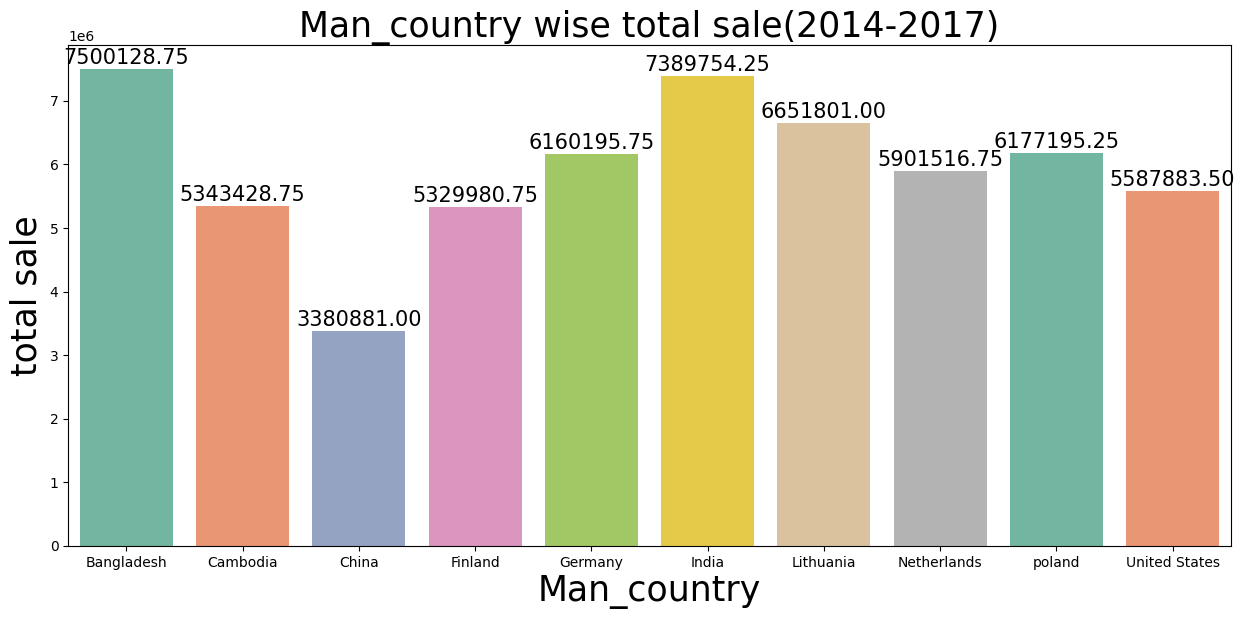

In [186]:
plt.figure(figsize=(15,6.5))
plots = sns.barplot(x=df_q16['Man_country'],y=df_q16['Sale'],palette="Set2")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0, 8),
                   textcoords='offset points')
    
                   
                  
plt.xlabel('Man_country',fontsize=25)
plt.ylabel('total sale',fontsize=25)
plt.title('Man_country wise total sale(2014-2017)',fontsize=25)

plt.show()       

# 4.1) How many products are sold from "Rajshahi" division in second quarter of 2017 ?

In [18]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT SUM(ft.quantity) as total_products " \
              "FROM ecombd_star_schema.fact_table ft " \
              "JOIN ecombd_star_schema.store_dim st on st.store_key=ft.store_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE tm.year = 2017 and tm.quarter = 'Q2' and st.division = 'RAJSHAHI' " \
             



cur.execute(select_stmt)
record_q17 = cur.fetchall()

successfully connected to database


In [19]:
record_q17

[(Decimal('24635'),)]

In [20]:
df_q17 = pd.DataFrame(record_q17, columns=['total_products'])
df_q17.dtypes

total_products    object
dtype: object

In [21]:
print('Total product sold: 'f"{df_q17['total_products'].values[0]}",)

Total product sold: 24635


# 4.2) Find division wise total product sold from 2019 to 2021

In [22]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT st.division, SUM(ft.quantity) as total_products " \
              "FROM ecombd_star_schema.fact_table ft " \
              "JOIN ecombd_star_schema.store_dim st on st.store_key=ft.store_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE tm.year >= 2017 and tm.year <= 2019 " \
              "GROUP BY CUBE(st.division) "\



cur.execute(select_stmt)
record_q18 = cur.fetchall()

successfully connected to database


In [10]:
record_q18

[(None, 427469),
 ('RAJSHAHI', 49226),
 ('DHAKA', 165203),
 ('CHITTAGONG', 80258),
 ('BARISAL', 30402),
 ('RANGPUR', 34321),
 ('KHULNA', 45736),
 ('SYLHET', 22323)]

In [23]:
df_q18 = pd.DataFrame(record_q18, columns=['Division','total_product'])
df_q18 = df_q18.dropna()

df_q18

,Division,total_product
1,RAJSHAHI,294361
2,DHAKA,991100
3,CHITTAGONG,482384
4,BARISAL,181941
5,RANGPUR,205925
6,KHULNA,275174
7,SYLHET,134218


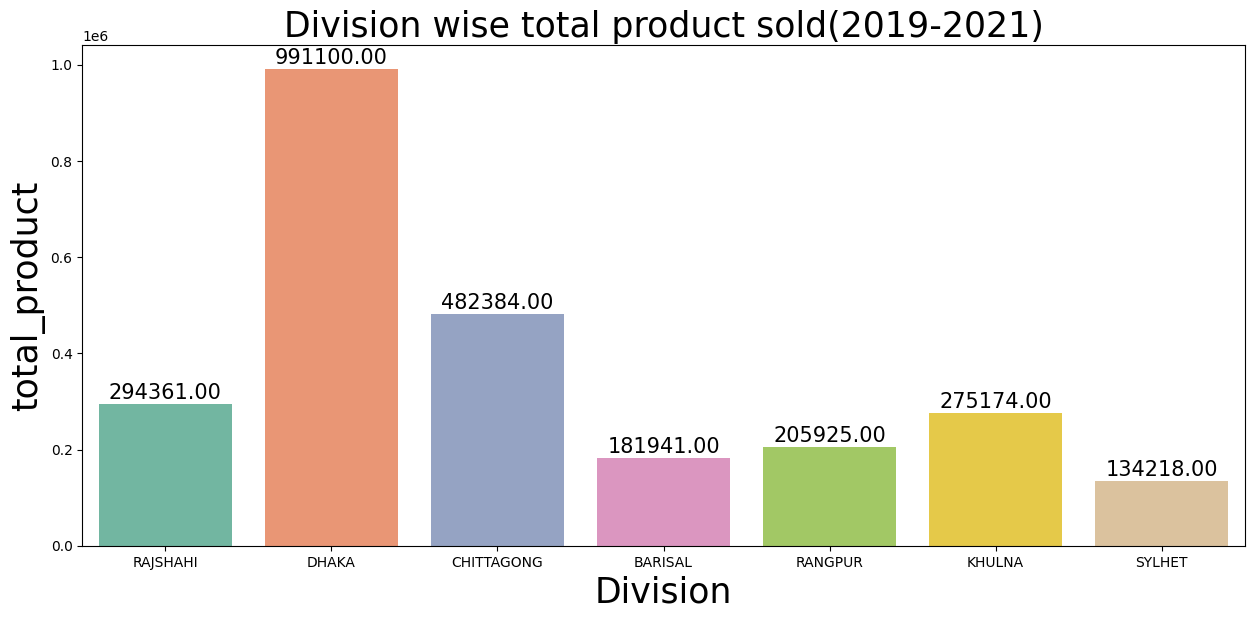

In [24]:
plt.figure(figsize=(15,6.5))
plots = sns.barplot(x=df_q18['Division'],y=df_q18['total_product'],palette="Set2")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0, 8),
                   textcoords='offset points')
    
                   
                  
plt.xlabel('Division',fontsize=25)
plt.ylabel('total_product',fontsize=25)
plt.title('Division wise total product sold(2019-2021)',fontsize=25)

plt.show()  

# 5.1)  Which supplier's products are sold most often from 'Bangladesh' in 2020 ?

In [27]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT it.supplier, SUM(ft.quantity) as total_products " \
              "FROM ecombd_star_schema.fact_table ft " \
              "JOIN ecombd_star_schema.item_dim it on it.item_key=ft.item_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE tm.year = 2020 and it.man_country ='Bangladesh' " \
              "GROUP BY CUBE(it.supplier) "\
              "ORDER BY total_products"




cur.execute(select_stmt)
record_q19 = cur.fetchall()

successfully connected to database


In [30]:
record_q19

[(None, Decimal('109902')), ('DENIMACH LTD', Decimal('109902'))]

In [31]:
df_q19 = pd.DataFrame(record_q19, columns=['supplier','total_product'])
df_q19 = df_q19.dropna()

df_q19

,supplier,total_product
1,DENIMACH LTD,109902


In [33]:
print("The supplier's name: '",f"{df_q19['supplier'].values[0]}","' and their total product sold: ",
      f"{df_q19['total_product'].values[0]}")

The supplier's name: ' DENIMACH LTD ' and their total product sold:  109902


# 5.2) Find supplier wise total product sold from 2015 to 2019


In [34]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT it.supplier, SUM(ft.quantity) as total_products " \
              "FROM ecombd_star_schema.fact_table ft " \
              "JOIN ecombd_star_schema.item_dim it on it.item_key=ft.item_key " \
              "JOIN ecombd_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE tm.year >= 2015 and  tm.year <= 2019  " \
              "GROUP BY CUBE(it.supplier) "\




cur.execute(select_stmt)
record_q20 = cur.fetchall()

successfully connected to database


In [35]:
record_q20

[(None, Decimal('4276954')),
 ('BIGSO AB', Decimal('423284')),
 ('CHERRY GROUP CO.,LTD', Decimal('258038')),
 ('Indo Count Industries Ltd', Decimal('519741')),
 ('NINGBO SEDUNO IMP & EXP CO.LTD', Decimal('390289')),
 ('HARDFORD AB', Decimal('435402')),
 ('Friedola 1888 GmbH', Decimal('497587')),
 ('MAESA SAS', Decimal('325938')),
 ('Bolsius Boxmeer', Decimal('421550')),
 ('DENIMACH LTD', Decimal('552027')),
 ('CHROMADURLIN S.A.S', Decimal('453098'))]

In [40]:
df_q20 = pd.DataFrame(record_q20, columns=['supplier','total_product'])
df_q20 = df_q20.dropna()
df_q20['total_product']=df_q20['total_product'].astype('int64')  

df_q20.dtypes

supplier         object
total_product     int64
dtype: object

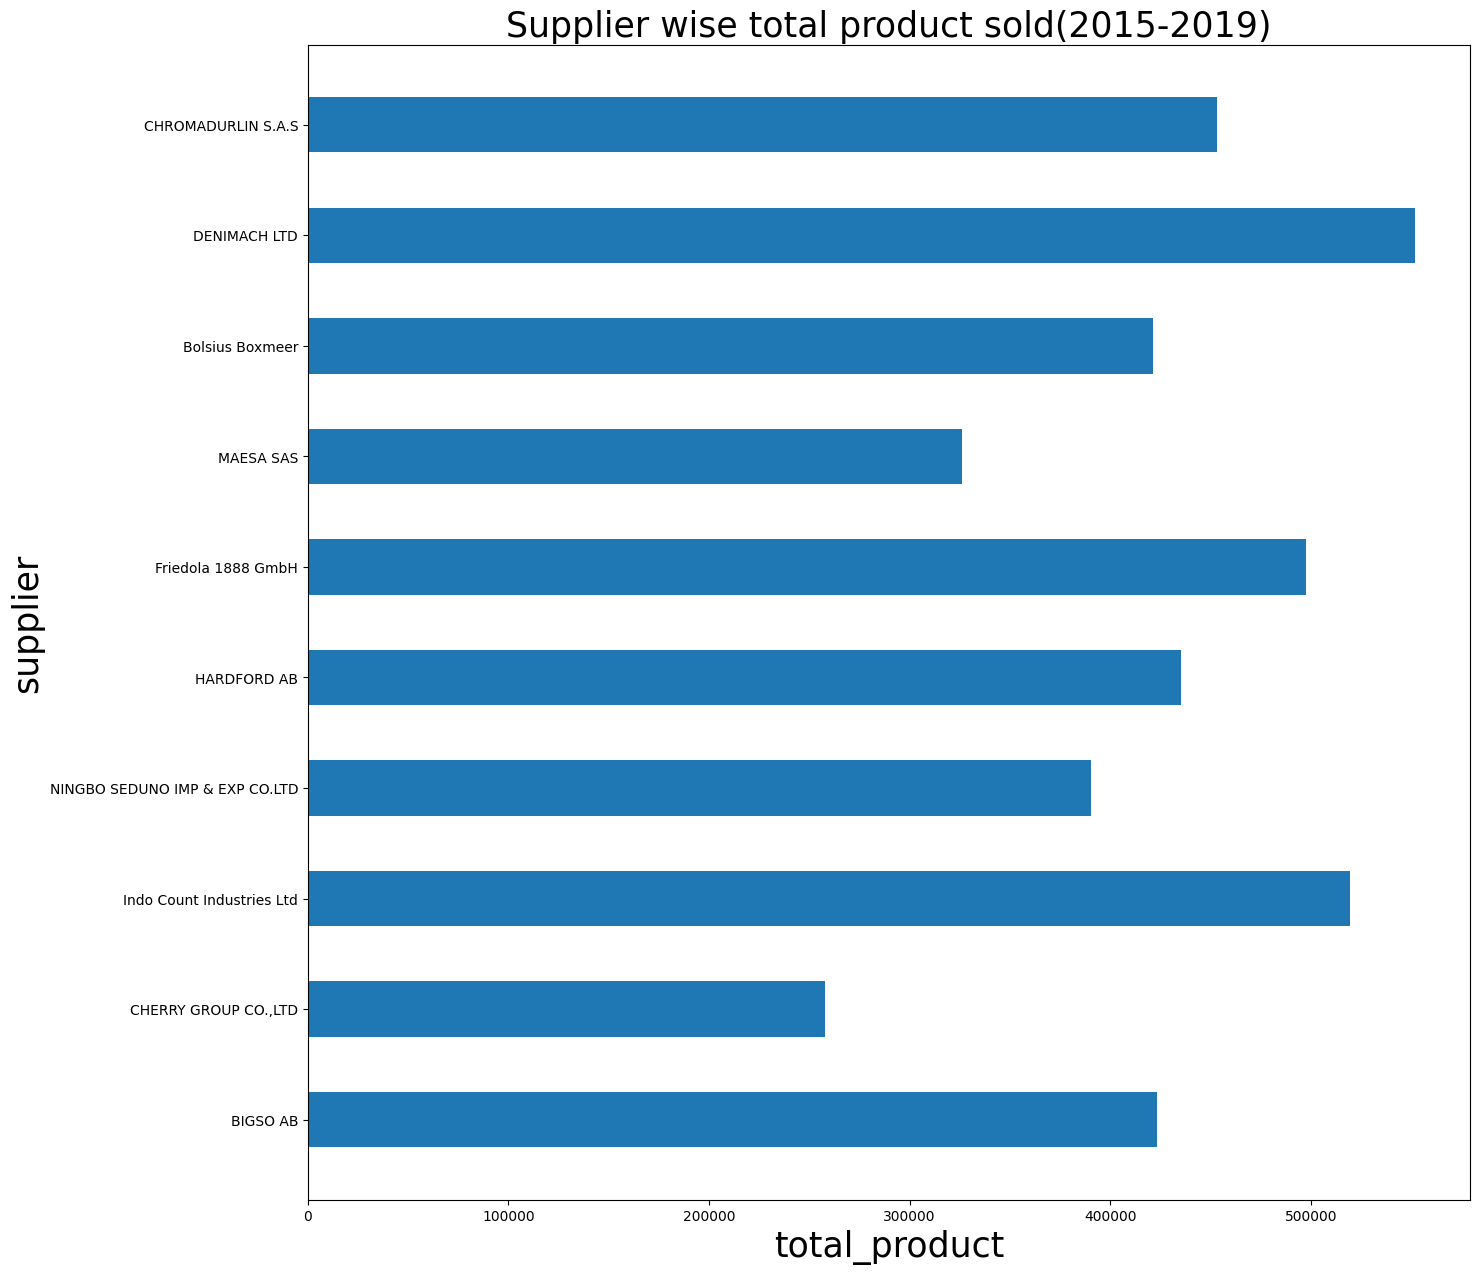

In [42]:
plt.figure(figsize=(15,15))
barlist = plt.barh(df_q20['supplier'],df_q20['total_product'],height = 0.5)
plt.xlabel('total_product',fontsize = 25)
plt.ylabel('supplier',fontsize = 25)
plt.title('Supplier wise total product sold(2015-2019)',fontsize = 25)
plt.show()